In [1]:
import platform
import PIL  # Pillow 包通常在 Python 中以 PIL 名称导入
import jupyterlab
import matplotlib
import ipympl
import numpy as np
import pandas as pd

# 打印 Python 版本
print("Python version:", platform.python_version())

# 打印 Pillow 版本
print("Pillow version:", PIL.__version__)

# 打印 JupyterLab 版本
print("JupyterLab version:", jupyterlab.__version__)

# 打印 matplotlib 版本
print("matplotlib version:", matplotlib.__version__)

# 打印 ipympl 版本
print("ipympl version:", ipympl.__version__)


# Python version: 3.10.16
# Pillow version: 11.1.0
# JupyterLab version: 4.3.5
# matplotlib version: 3.10.0
# ipympl version: 0.9.6


Python version: 3.10.16
Pillow version: 11.1.0
JupyterLab version: 4.3.5
matplotlib version: 3.10.0
ipympl version: 0.9.6


In [2]:
# print current directory
import os
print("Current directory:", os.getcwd())

Current directory: c:\Users\mingzhchen\Documents\Git\Open_flow\20251107


In [3]:
import sys
# append the current directory to sys.path
sys.path.append("..")
from openflow import InteractivePolygonGating, InteractiveHistogramThreshold
from utils import *
from utils_plots import *

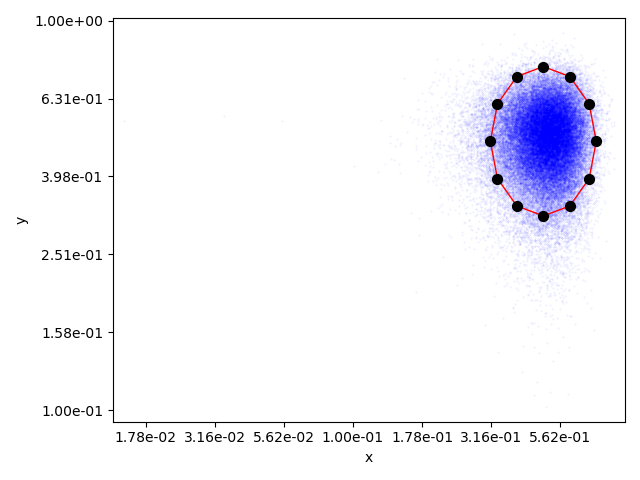

In [4]:
%matplotlib widget
# Example usage:
if __name__ == "__main__":
    np.random.seed(0)
    # Generate sample data using normal distribution
    data = {
        'x': np.random.normal(0.5, 0.1, 60000),
        'y': np.random.normal(0.5, 0.1, 60000)
    }
    df = pd.DataFrame(data)

    # Create an instance of InteractivePolygonGating with 5 vertices and logarithmic scale enabled.
    gate1 = InteractivePolygonGating(df, 'x', 'y', num_edges=12, log=True)
    # As you drag the polygon the histograms and scatter plot will update.



In [5]:
experiment_name = 'Exp_20251107_1'

In [6]:
import shutil
data_path = f'D:\FACS\{experiment_name}'
data_source_path = f'Z:\cytoflex\{experiment_name}'


In [7]:
# Copy data folder from data_source_path to data_path, if data_path directory doesn't exist, create it
shutil.copytree(data_source_path, data_path, dirs_exist_ok=True)

'D:\\FACS\\Exp_20251107_1'

          FSC-H         FSC-A        SSC-H         SSC-A         FITC-H  \
0  3.606797e+06  8.215146e+06  4148261.500  7.215332e+06  239370.796875   
1  3.780283e+06  9.419988e+06  5638699.500  1.243332e+07  357977.687500   
2  3.884581e+06  9.404692e+06  5108024.000  8.828482e+06  463442.406250   
3  1.000378e+06  9.563082e+05   899291.125  1.056834e+06   14468.500000   
4  3.989382e+06  1.123538e+07  5642201.000  1.433366e+07  407561.593750   

          FITC-A       APC-H       APC-A     mCherry-H     mCherry-A  \
0  367563.093750  213.600006 -151.399994  42601.398438  85205.000000   
1  611495.500000  579.200012  677.799988  14534.299805  30329.300781   
2  738721.812500  373.000000  499.000000  20996.800781  42336.101562   
3   15442.099609  200.500000  -77.500000    302.500000    149.699997   
4  739225.875000  460.100006  304.899994  17004.300781  37232.898438   

     FSC-Width    Time  
0  2332.352051     0.0  
1  2551.680420   655.0  
2  2479.139160   828.0  
3   978.890808  

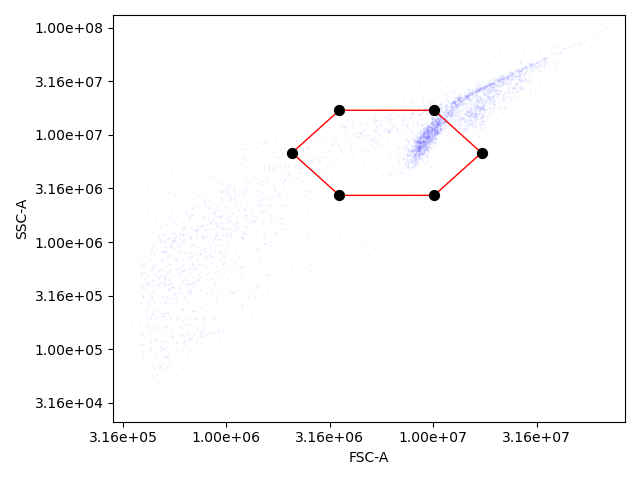

In [8]:

import FlowCal
import pandas as pd


# Read the example .facs file
test_file_path = data_path + '/01-Well-A1.fcs'
data = FlowCal.io.FCSData(test_file_path)

# Convert to a pandas DataFrame
df = pd.DataFrame(data, columns=data._channel_labels)
print(df.head())

# Filter the DataFrame

filtered_df = df[(df['FSC-A'] > 0) & (df['SSC-A'] > 0)]

# selector = InteractivePolygonSelector(df, 'FSC-A', 'SSC-A', num_edges=5, log_log=True)
gate1 = InteractivePolygonGating(filtered_df, 'FSC-A', 'SSC-A', num_edges=6, log=True)


In [9]:
data.__dict__

{'_infile': 'D:\\FACS\\Exp_20251107_1/01-Well-A1.fcs',
 '_text': {'$BEGINSTEXT': '0',
  '$ENDSTEXT': '0',
  '$BEGINDATA': '0000000000006672',
  '$ENDDATA': '0000000000158399',
  '$BEGINANALYSIS': '0',
  '$ENDANALYSIS': '0',
  '$TOT': '0000000000003161',
  'FILVER': '1',
  '$FIL': '01-Well-A1.fcs',
  '$SYS': 'Microsoft Windows NT 6.2.9200.0',
  '$MODE': 'L',
  '$BYTEORD': '1,2,3,4',
  '$DATATYPE': 'F',
  '$NEXTDATA': '0',
  'CYTEXPERTFIL': 'True',
  'TBID': '06afd232-c6d9-47bc-8dc0-9da91442a0d2',
  'TBNM': '01-Well-A1',
  '$PAR': '12',
  '$BTIM': '17:32:56',
  '$ETIM': '17:33:30',
  '$DATE': '07-Nov-2025',
  '$CYT': 'CytoFLEX S',
  'RCTOT': '10000',
  'USRCTOT': 'True',
  'CGNM': 'All Events ',
  'RCTIM': '34',
  'USRCTIM': 'True',
  '$SPILLOVER': '6,FL5-H,FL11-H,FL8-H,FL5-A,FL11-A,FL8-A,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1',
  'RCVOL': '10',
  'USRCVOL': 'False',
  '$TIMESTEP': '0.00002',
  '$P1N': 'FSC-H',
  '$P1S': 'FSC-H',
  '$P1R': '16777216',
  '

In [10]:
data._channel_labels

('FSC-H',
 'FSC-A',
 'SSC-H',
 'SSC-A',
 'FITC-H',
 'FITC-A',
 'APC-H',
 'APC-A',
 'mCherry-H',
 'mCherry-A',
 'FSC-Width',
 'Time')

| 通道          | 对应荧光分子                            |
| :---------- | :-------------------------------- |
| **FITC**    | GFP, mGreenLantern                |
| **mCherry** | Cy3, mCherry, **mScarlet, mRuby** |
| **APC**     | APC, Cy5（远红）                      |

while need double check, generated from gpt

In [11]:
data.channels

('FSC-H',
 'FSC-A',
 'SSC-H',
 'SSC-A',
 'FL5-H',
 'FL5-A',
 'FL11-H',
 'FL11-A',
 'FL8-H',
 'FL8-A',
 'FSC-Width',
 'Time')

In [12]:
df2 = gate1.selected_data
print(df2.head())

        FSC-H       FSC-A       SSC-H       SSC-A         FITC-H  \
0  3606796.75   8215145.5  4148261.50   7215332.0  239370.796875   
1  3780283.25   9419988.0  5638699.50  12433319.0  357977.687500   
2  3884581.00   9404692.0  5108024.00   8828482.0  463442.406250   
4  3989382.50  11235382.0  5642201.00  14333664.0  407561.593750   
5  3689517.25  15454979.0  3551121.75  11802128.0  303378.187500   

         FITC-A       APC-H       APC-A     mCherry-H      mCherry-A  \
0  367563.09375  213.600006 -151.399994  42601.398438   85205.000000   
1  611495.50000  579.200012  677.799988  14534.299805   30329.300781   
2  738721.81250  373.000000  499.000000  20996.800781   42336.101562   
4  739225.87500  460.100006  304.899994  17004.300781   37232.898438   
5  761424.62500  296.299988  130.100006  56235.101562  190656.593750   

     FSC-Width    Time  
0  2332.352051     0.0  
1  2551.680420   655.0  
2  2479.139160   828.0  
4  2883.917480  2331.0  
5  4289.428711  2392.0  


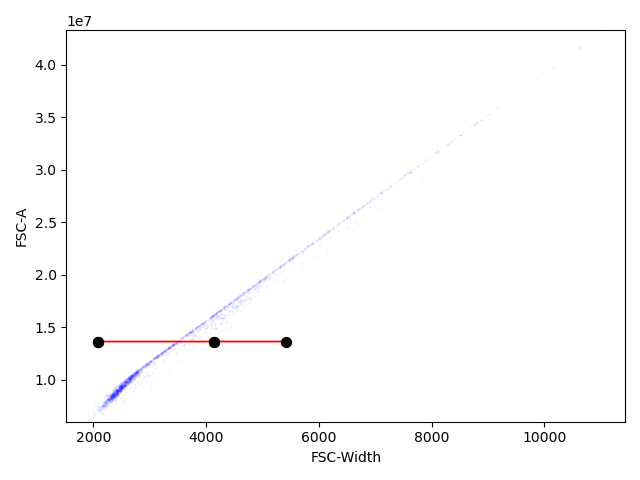

In [13]:
# selector = InteractivePolygonSelector(df, 'FSC-A', 'SSC-A', num_edges=5, log_log=True)
gate2 = InteractivePolygonGating(df2, 'FSC-Width', 'FSC-A', num_edges=5, log=False)


In [14]:
df3 = gate2.selected_data
print(df3.head())

        FSC-H       FSC-A       SSC-H       SSC-A         FITC-H  \
0  3606796.75   8215145.5  4148261.50   7215332.0  239370.796875   
1  3780283.25   9419988.0  5638699.50  12433319.0  357977.687500   
2  3884581.00   9404692.0  5108024.00   8828482.0  463442.406250   
4  3989382.50  11235382.0  5642201.00  14333664.0  407561.593750   
5  3689517.25  15454979.0  3551121.75  11802128.0  303378.187500   

         FITC-A       APC-H       APC-A     mCherry-H      mCherry-A  \
0  367563.09375  213.600006 -151.399994  42601.398438   85205.000000   
1  611495.50000  579.200012  677.799988  14534.299805   30329.300781   
2  738721.81250  373.000000  499.000000  20996.800781   42336.101562   
4  739225.87500  460.100006  304.899994  17004.300781   37232.898438   
5  761424.62500  296.299988  130.100006  56235.101562  190656.593750   

     FSC-Width    Time  
0  2332.352051     0.0  
1  2551.680420   655.0  
2  2479.139160   828.0  
4  2883.917480  2331.0  
5  4289.428711  2392.0  


Number of selected items: 837


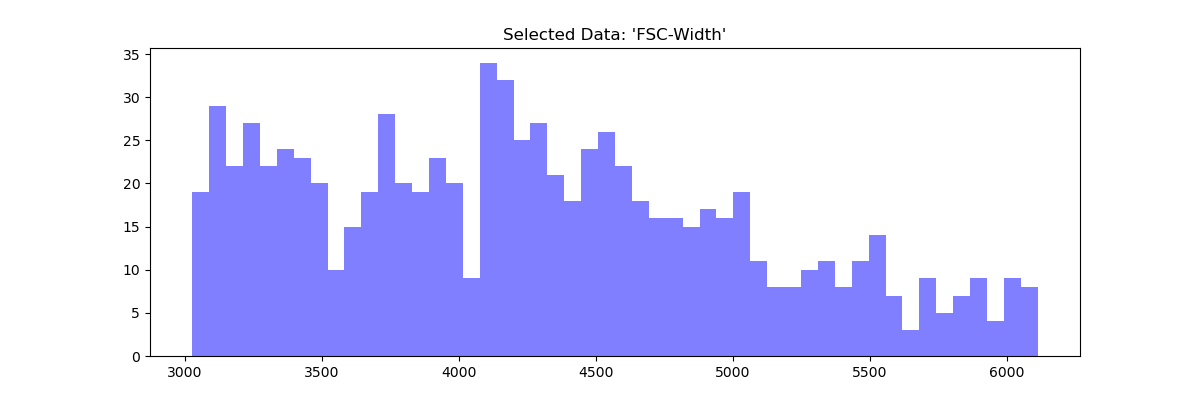

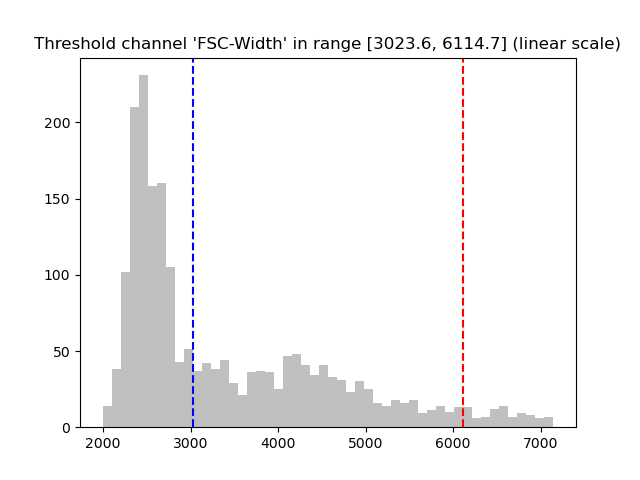

In [15]:
gate3 = InteractiveHistogramThreshold(
    data=df3,
    threshold_channel='FSC-Width',
    plot_channels=['FSC-Width']
)

In [16]:
# Get Valid range of singlet
df4 = gate3.selected_data
print(df4.head())
df4

        FSC-H       FSC-A      SSC-H       SSC-A         FITC-H        FITC-A  \
0  3606796.75   8215145.5  4148261.5   7215332.0  239370.796875  367563.09375   
1  3780283.25   9419988.0  5638699.5  12433319.0  357977.687500  611495.50000   
2  3884581.00   9404692.0  5108024.0   8828482.0  463442.406250  738721.81250   
4  3989382.50  11235382.0  5642201.0  14333664.0  407561.593750  739225.87500   
7  4003459.25  11974805.0  5556702.0  14152787.0  504768.500000  934732.62500   

        APC-H       APC-A     mCherry-H     mCherry-A    FSC-Width    Time  
0  213.600006 -151.399994  42601.398438  85205.000000  2332.352051     0.0  
1  579.200012  677.799988  14534.299805  30329.300781  2551.680420   655.0  
2  373.000000  499.000000  20996.800781  42336.101562  2479.139160   828.0  
4  460.100006  304.899994  17004.300781  37232.898438  2883.917480  2331.0  
7  293.899994  325.500000  15319.900391  35650.398438  3062.903564  3054.0  


FSC-H       FSC-A      SSC-H       SSC-A         FITC-H  \
0     3606796.75   8215145.5  4148261.5   7215332.0  239370.796875   
1     3780283.25   9419988.0  5638699.5  12433319.0  357977.687500   
2     3884581.00   9404692.0  5108024.0   8828482.0  463442.406250   
4     3989382.50  11235382.0  5642201.0  14333664.0  407561.593750   
7     4003459.25  11974805.0  5556702.0  14152787.0  504768.500000   
...          ...         ...        ...         ...            ...   
3149  3788247.75   9248440.0  4380553.0   7701070.5  376891.500000   
3151  4004757.00  13133619.0  5653642.5  19000040.0  683108.500000   
3152  4001079.75  14319702.0  5653673.0  25121004.0   17163.500000   
3154  3995773.00  10233487.0  5639098.5  13388906.0  424148.500000   
3155  3980558.50  10707136.0  5652701.5  13893962.0  375699.593750   

            FITC-A        APC-H         APC-A     mCherry-H      mCherry-A  \
0     3.675631e+05   213.600006   -151.399994  42601.398438   85205.000000   
1     6.114955e+05   579.200012    677.799988  14534.299805   30329.300781   
2     7.387218e+05   373.000000    499.000000  20996.800781   42336.101562   
4     7.392259e+05   460.100006    304.899994  17004.300781   37232.898438   
7     9.347326e+05   293.899994    325.500000  15319.900391   35650.398438   
...            ...          ...           ...           ...            ...   
3149  5.936903e+05   224.699997    262.299988  11851.200195   23981.599609   
3151  1.422659e+06   335.700012    248.199997  45504.101562  110751.000000   
3152  3.625680e+04  6320.700195  15257.799805  19795.199219   48658.601562   
3154  7.077318e+05   407.700012    406.200012  24040.099609   50276.000000   
3155  6.571789e+05   404.500000    274.399994  23239.199219   50482.101562   

        FSC-Width       Time  
0     2332.352051        0.0  
1     2551.680420      655.0  
2     2479.139160      828.0  
4     2883.917480     2331.0  
7     3062.903564     3054.0  
...           ...        ...  
3149  2499.947998  1688661.0  
3151  3358.216553  1690559.0  
3152  3664.861572  1695938.0  
3154  2622.547119  1696290.0  
3155  2754.418701  1696290.0  

[1445 rows x 12 columns]

Number of selected items: 1390


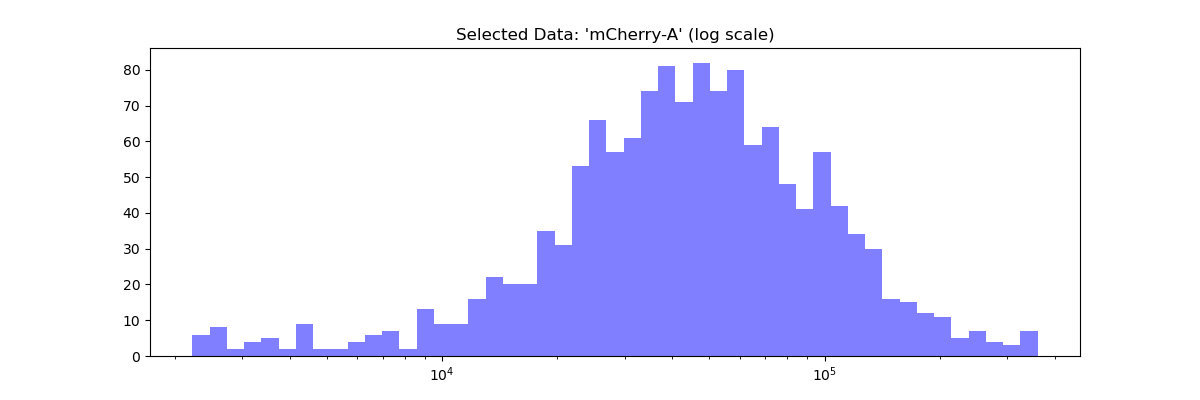

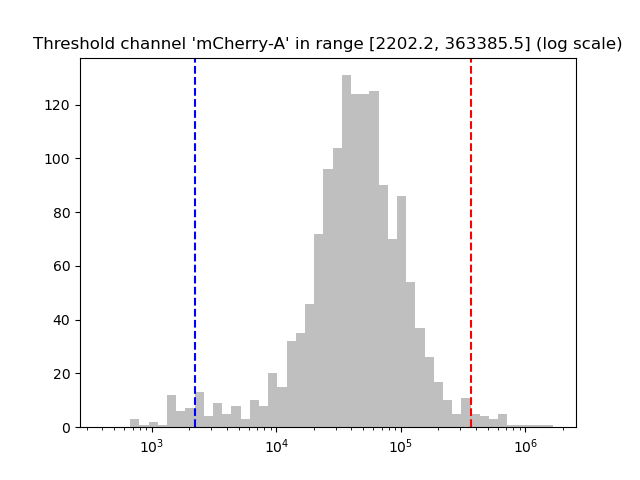

In [17]:
gate4 = InteractiveHistogramThreshold(
    data=df4,
    threshold_channel='mCherry-A',
    plot_channels=['mCherry-A'],
    log_scale = True
)

In [18]:

# Example usage
if __name__ == "__main__":
    # Gating strategy defined (assuming gating_strategy = [gate1, gate2, gate3] is already defined)
    gating_strategy = [gate1,gate2,gate3]
    folder_path = f'D:\FACS\{experiment_name}'
    output_folder = f'D:\FACS_analysis\{experiment_name}'

    # Process all .fcs files
    combined_df, processed_dfs = process_all_fcs_files(folder_path, gating_strategy)
    
    # Save results
    save_results(combined_df, processed_dfs, output_folder)
    
    # Display some basic statistics for the merged data
    if not combined_df.empty:
        print("\nBasic statistics:")
        print(f"Total event count: {combined_df.shape[0]}")
        print(f"Average events per file: {combined_df.shape[0] / len(processed_dfs):.2f}")
        
        # Group statistics by filename
        file_counts = combined_df.groupby('file_name').size()
        print("\nEvent count per file:")
        print(file_counts)

Found 192 files to process


Processing files:   0%|          | 0/192 [00:00<?, ?it/s]

Applied gate to new data. Selected 1445 out of 2038 items.
Processing complete: 01-Well-A1.fcs - Original events: 3161, Processed events: 1445
Applied gate to new data. Selected 4218 out of 5528 items.
Processing complete: 01-Well-A10.fcs - Original events: 7682, Processed events: 4218
Applied gate to new data. Selected 189 out of 233 items.
Processing complete: 01-Well-A11.fcs - Original events: 429, Processed events: 189
Applied gate to new data. Selected 4 out of 5 items.
Processing complete: 01-Well-A12.fcs - Original events: 88, Processed events: 4
Applied gate to new data. Selected 44 out of 51 items.
Processing complete: 01-Well-A2.fcs - Original events: 190, Processed events: 44
Applied gate to new data. Selected 1 out of 2 items.
Processing complete: 01-Well-A3.fcs - Original events: 109, Processed events: 1


Processing files:   3%|▎         | 6/192 [00:00<00:03, 57.81it/s]

Applied gate to new data. Selected 1 out of 1 items.
Processing complete: 01-Well-A4.fcs - Original events: 139, Processed events: 1
Applied gate to new data. Selected 6432 out of 7977 items.
Processing complete: 01-Well-A5.fcs - Original events: 10000, Processed events: 6432
Applied gate to new data. Selected 38 out of 42 items.
Processing complete: 01-Well-A6.fcs - Original events: 196, Processed events: 38
Applied gate to new data. Selected 4389 out of 5987 items.
Processing complete: 01-Well-A7.fcs - Original events: 7912, Processed events: 4389
Applied gate to new data. Selected 4699 out of 6065 items.
Processing complete: 01-Well-A8.fcs - Original events: 8240, Processed events: 4699
Applied gate to new data. Selected 2958 out of 4226 items.
Processing complete: 01-Well-A9.fcs - Original events: 5980, Processed events: 2958


Processing files:   6%|▋         | 12/192 [00:00<00:04, 37.45it/s]

Applied gate to new data. Selected 6 out of 10 items.
Processing complete: 01-Well-B1.fcs - Original events: 175, Processed events: 6
Applied gate to new data. Selected 187 out of 213 items.
Processing complete: 01-Well-B10.fcs - Original events: 351, Processed events: 187
Applied gate to new data. Selected 6995 out of 8439 items.
Processing complete: 01-Well-B11.fcs - Original events: 10000, Processed events: 6995
Applied gate to new data. Selected 4655 out of 6481 items.
Processing complete: 01-Well-B12.fcs - Original events: 10000, Processed events: 4655
Applied gate to new data. Selected 1 out of 1 items.
Processing complete: 01-Well-B2.fcs - Original events: 113, Processed events: 1


Processing files:   9%|▉         | 17/192 [00:00<00:04, 35.95it/s]

Applied gate to new data. Selected 0 out of 0 items.
Processing complete: 01-Well-B3.fcs - Original events: 87, Processed events: 0
Applied gate to new data. Selected 4331 out of 6249 items.
Processing complete: 01-Well-B4.fcs - Original events: 9711, Processed events: 4331
Applied gate to new data. Selected 121 out of 141 items.
Processing complete: 01-Well-B5.fcs - Original events: 285, Processed events: 121
Applied gate to new data. Selected 11 out of 13 items.
Processing complete: 01-Well-B6.fcs - Original events: 110, Processed events: 11
Applied gate to new data. Selected 5 out of 5 items.
Processing complete: 01-Well-B7.fcs - Original events: 61, Processed events: 5
Applied gate to new data. Selected 6512 out of 8092 items.
Processing complete: 01-Well-B8.fcs - Original events: 10000, Processed events: 6512


Processing files:  12%|█▏        | 23/192 [00:00<00:04, 39.20it/s]

Applied gate to new data. Selected 5981 out of 8119 items.
Processing complete: 01-Well-B9.fcs - Original events: 10000, Processed events: 5981
Applied gate to new data. Selected 5294 out of 7395 items.
Processing complete: 01-Well-C1.fcs - Original events: 10000, Processed events: 5294
Applied gate to new data. Selected 0 out of 0 items.
Processing complete: 01-Well-C10.fcs - Original events: 141, Processed events: 0
Applied gate to new data. Selected 85 out of 89 items.
Processing complete: 01-Well-C11.fcs - Original events: 357, Processed events: 85
Applied gate to new data. Selected 7436 out of 8853 items.
Processing complete: 01-Well-C12.fcs - Original events: 10000, Processed events: 7436


Processing files:  15%|█▍        | 28/192 [00:00<00:04, 34.25it/s]

Applied gate to new data. Selected 5 out of 6 items.
Processing complete: 01-Well-C2.fcs - Original events: 74, Processed events: 5
Applied gate to new data. Selected 9 out of 11 items.
Processing complete: 01-Well-C3.fcs - Original events: 87, Processed events: 9
Applied gate to new data. Selected 10 out of 12 items.
Processing complete: 01-Well-C4.fcs - Original events: 108, Processed events: 10
Applied gate to new data. Selected 5989 out of 7879 items.
Processing complete: 01-Well-C5.fcs - Original events: 10000, Processed events: 5989
Applied gate to new data. Selected 4 out of 5 items.
Processing complete: 01-Well-C6.fcs - Original events: 71, Processed events: 4
Applied gate to new data. Selected 973 out of 1270 items.
Processing complete: 01-Well-C7.fcs - Original events: 2528, Processed events: 973


Processing files:  18%|█▊        | 34/192 [00:00<00:04, 38.92it/s]

Applied gate to new data. Selected 2 out of 2 items.
Processing complete: 01-Well-C8.fcs - Original events: 130, Processed events: 2
Applied gate to new data. Selected 0 out of 0 items.
Processing complete: 01-Well-C9.fcs - Original events: 102, Processed events: 0
Applied gate to new data. Selected 20 out of 30 items.
Processing complete: 01-Well-D1.fcs - Original events: 221, Processed events: 20
Applied gate to new data. Selected 6647 out of 8544 items.
Processing complete: 01-Well-D10.fcs - Original events: 10000, Processed events: 6647
Applied gate to new data. Selected 0 out of 0 items.
Processing complete: 01-Well-D11.fcs - Original events: 105, Processed events: 0
Applied gate to new data. Selected 4715 out of 6974 items.
Processing complete: 01-Well-D12.fcs - Original events: 10000, Processed events: 4715


Processing files:  21%|██        | 40/192 [00:01<00:03, 39.03it/s]

Applied gate to new data. Selected 468 out of 585 items.
Processing complete: 01-Well-D2.fcs - Original events: 1188, Processed events: 468
Applied gate to new data. Selected 0 out of 0 items.
Processing complete: 01-Well-D3.fcs - Original events: 138, Processed events: 0
Applied gate to new data. Selected 2 out of 2 items.
Processing complete: 01-Well-D4.fcs - Original events: 247, Processed events: 2
Applied gate to new data. Selected 5666 out of 7661 items.
Processing complete: 01-Well-D5.fcs - Original events: 10000, Processed events: 5666
Applied gate to new data. Selected 2 out of 3 items.
Processing complete: 01-Well-D6.fcs - Original events: 121, Processed events: 2
Applied gate to new data. Selected 1 out of 1 items.
Processing complete: 01-Well-D7.fcs - Original events: 92, Processed events: 1
Applied gate to new data. Selected 0 out of 0 items.
Processing complete: 01-Well-D8.fcs - Original events: 128, Processed events: 0


Processing files:  24%|██▍       | 47/192 [00:01<00:03, 44.94it/s]

Applied gate to new data. Selected 0 out of 0 items.
Processing complete: 01-Well-D9.fcs - Original events: 114, Processed events: 0
Applied gate to new data. Selected 1581 out of 2524 items.
Processing complete: 01-Well-E1.fcs - Original events: 5219, Processed events: 1581
Applied gate to new data. Selected 3 out of 3 items.
Processing complete: 01-Well-E10.fcs - Original events: 79, Processed events: 3
Applied gate to new data. Selected 5293 out of 7126 items.
Processing complete: 01-Well-E11.fcs - Original events: 10000, Processed events: 5293
Applied gate to new data. Selected 1855 out of 2832 items.
Processing complete: 01-Well-E12.fcs - Original events: 6204, Processed events: 1855


Processing files:  27%|██▋       | 52/192 [00:01<00:03, 44.36it/s]

Applied gate to new data. Selected 5398 out of 7516 items.
Processing complete: 01-Well-E2.fcs - Original events: 10000, Processed events: 5398
Applied gate to new data. Selected 15 out of 21 items.
Processing complete: 01-Well-E3.fcs - Original events: 120, Processed events: 15
Applied gate to new data. Selected 1452 out of 2456 items.
Processing complete: 01-Well-E4.fcs - Original events: 5352, Processed events: 1452
Applied gate to new data. Selected 13 out of 16 items.
Processing complete: 01-Well-E5.fcs - Original events: 100, Processed events: 13
Applied gate to new data. Selected 2 out of 3 items.
Processing complete: 01-Well-E6.fcs - Original events: 83, Processed events: 2


Processing files:  30%|██▉       | 57/192 [00:01<00:03, 42.21it/s]

Applied gate to new data. Selected 5828 out of 7934 items.
Processing complete: 01-Well-E7.fcs - Original events: 10000, Processed events: 5828
Applied gate to new data. Selected 5074 out of 7470 items.
Processing complete: 01-Well-E8.fcs - Original events: 10000, Processed events: 5074
Applied gate to new data. Selected 47 out of 52 items.
Processing complete: 01-Well-E9.fcs - Original events: 145, Processed events: 47
Applied gate to new data. Selected 33 out of 42 items.
Processing complete: 01-Well-F1.fcs - Original events: 209, Processed events: 33
Applied gate to new data. Selected 2 out of 2 items.
Processing complete: 01-Well-F10.fcs - Original events: 86, Processed events: 2


Processing files:  32%|███▏      | 62/192 [00:01<00:03, 40.73it/s]

Applied gate to new data. Selected 6413 out of 7974 items.
Processing complete: 01-Well-F11.fcs - Original events: 10000, Processed events: 6413
Applied gate to new data. Selected 5561 out of 7571 items.
Processing complete: 01-Well-F12.fcs - Original events: 10000, Processed events: 5561
Applied gate to new data. Selected 5978 out of 8077 items.
Processing complete: 01-Well-F2.fcs - Original events: 10000, Processed events: 5978
Applied gate to new data. Selected 12 out of 13 items.
Processing complete: 01-Well-F3.fcs - Original events: 111, Processed events: 12
Applied gate to new data. Selected 23 out of 25 items.
Processing complete: 01-Well-F4.fcs - Original events: 135, Processed events: 23


Processing files:  35%|███▍      | 67/192 [00:01<00:03, 35.71it/s]

Applied gate to new data. Selected 6196 out of 7834 items.
Processing complete: 01-Well-F5.fcs - Original events: 10000, Processed events: 6196
Applied gate to new data. Selected 4924 out of 7046 items.
Processing complete: 01-Well-F6.fcs - Original events: 10000, Processed events: 4924
Applied gate to new data. Selected 28 out of 34 items.
Processing complete: 01-Well-F7.fcs - Original events: 101, Processed events: 28
Applied gate to new data. Selected 2623 out of 3875 items.
Processing complete: 01-Well-F8.fcs - Original events: 6648, Processed events: 2623


Processing files:  37%|███▋      | 71/192 [00:01<00:03, 32.98it/s]

Applied gate to new data. Selected 7 out of 8 items.
Processing complete: 01-Well-F9.fcs - Original events: 96, Processed events: 7
Applied gate to new data. Selected 27 out of 32 items.
Processing complete: 01-Well-G1.fcs - Original events: 172, Processed events: 27
Applied gate to new data. Selected 3173 out of 4903 items.
Processing complete: 01-Well-G10.fcs - Original events: 10000, Processed events: 3173
Applied gate to new data. Selected 1874 out of 2992 items.
Processing complete: 01-Well-G11.fcs - Original events: 6206, Processed events: 1874


Processing files:  39%|███▉      | 75/192 [00:01<00:03, 34.44it/s]

Applied gate to new data. Selected 1749 out of 2659 items.
Processing complete: 01-Well-G12.fcs - Original events: 5679, Processed events: 1749
Applied gate to new data. Selected 5679 out of 7697 items.
Processing complete: 01-Well-G2.fcs - Original events: 10000, Processed events: 5679
Applied gate to new data. Selected 6040 out of 8056 items.
Processing complete: 01-Well-G3.fcs - Original events: 10000, Processed events: 6040
Applied gate to new data. Selected 4431 out of 6542 items.
Processing complete: 01-Well-G4.fcs - Original events: 10000, Processed events: 4431


Processing files:  41%|████      | 79/192 [00:02<00:03, 28.79it/s]

Applied gate to new data. Selected 32 out of 36 items.
Processing complete: 01-Well-G5.fcs - Original events: 122, Processed events: 32
Applied gate to new data. Selected 2 out of 3 items.
Processing complete: 01-Well-G6.fcs - Original events: 82, Processed events: 2
Applied gate to new data. Selected 3 out of 3 items.
Processing complete: 01-Well-G7.fcs - Original events: 84, Processed events: 3
Applied gate to new data. Selected 1 out of 1 items.
Processing complete: 01-Well-G8.fcs - Original events: 69, Processed events: 1
Applied gate to new data. Selected 5637 out of 7565 items.
Processing complete: 01-Well-G9.fcs - Original events: 10000, Processed events: 5637


Processing files:  44%|████▍     | 84/192 [00:02<00:03, 33.41it/s]

Applied gate to new data. Selected 5045 out of 7006 items.
Processing complete: 01-Well-H1.fcs - Original events: 10000, Processed events: 5045
Applied gate to new data. Selected 9 out of 12 items.
Processing complete: 01-Well-H10.fcs - Original events: 102, Processed events: 9
Applied gate to new data. Selected 50 out of 61 items.
Processing complete: 01-Well-H11.fcs - Original events: 214, Processed events: 50
Applied gate to new data. Selected 1644 out of 2380 items.
Processing complete: 01-Well-H12.fcs - Original events: 4788, Processed events: 1644


Processing files:  46%|████▌     | 88/192 [00:02<00:02, 34.97it/s]

Applied gate to new data. Selected 5487 out of 7580 items.
Processing complete: 01-Well-H2.fcs - Original events: 10000, Processed events: 5487
Applied gate to new data. Selected 28 out of 35 items.
Processing complete: 01-Well-H3.fcs - Original events: 163, Processed events: 28
Applied gate to new data. Selected 4 out of 5 items.
Processing complete: 01-Well-H4.fcs - Original events: 103, Processed events: 4
Applied gate to new data. Selected 6 out of 7 items.
Processing complete: 01-Well-H5.fcs - Original events: 82, Processed events: 6
Applied gate to new data. Selected 3600 out of 5366 items.
Processing complete: 01-Well-H6.fcs - Original events: 10000, Processed events: 3600


Processing files:  48%|████▊     | 93/192 [00:02<00:02, 35.76it/s]

Applied gate to new data. Selected 4948 out of 7155 items.
Processing complete: 01-Well-H7.fcs - Original events: 10000, Processed events: 4948
Applied gate to new data. Selected 4621 out of 6801 items.
Processing complete: 01-Well-H8.fcs - Original events: 10000, Processed events: 4621
Applied gate to new data. Selected 26 out of 29 items.
Processing complete: 01-Well-H9.fcs - Original events: 103, Processed events: 26
Applied gate to new data. Selected 3370 out of 4269 items.
Processing complete: 02-Well-A1.fcs - Original events: 8688, Processed events: 3370


Processing files:  51%|█████     | 97/192 [00:02<00:02, 32.72it/s]

Applied gate to new data. Selected 6059 out of 6929 items.
Processing complete: 02-Well-A10.fcs - Original events: 10000, Processed events: 6059
Applied gate to new data. Selected 0 out of 3 items.
Processing complete: 02-Well-A11.fcs - Original events: 55, Processed events: 0
Applied gate to new data. Selected 1 out of 3 items.
Processing complete: 02-Well-A12.fcs - Original events: 134, Processed events: 1
Applied gate to new data. Selected 15 out of 20 items.
Processing complete: 02-Well-A2.fcs - Original events: 123, Processed events: 15


Processing files:  53%|█████▎    | 101/192 [00:02<00:02, 33.64it/s]

Applied gate to new data. Selected 2 out of 2 items.
Processing complete: 02-Well-A3.fcs - Original events: 59, Processed events: 2
Applied gate to new data. Selected 2 out of 2 items.
Processing complete: 02-Well-A4.fcs - Original events: 67, Processed events: 2
Applied gate to new data. Selected 5197 out of 6718 items.
Processing complete: 02-Well-A5.fcs - Original events: 10000, Processed events: 5197
Applied gate to new data. Selected 9 out of 10 items.
Processing complete: 02-Well-A6.fcs - Original events: 89, Processed events: 9
Applied gate to new data. Selected 5256 out of 6607 items.
Processing complete: 02-Well-A7.fcs - Original events: 10000, Processed events: 5256


Processing files:  55%|█████▌    | 106/192 [00:02<00:02, 34.39it/s]

Applied gate to new data. Selected 5567 out of 6814 items.
Processing complete: 02-Well-A8.fcs - Original events: 10000, Processed events: 5567
Applied gate to new data. Selected 4685 out of 5950 items.
Processing complete: 02-Well-A9.fcs - Original events: 10000, Processed events: 4685
Applied gate to new data. Selected 184 out of 243 items.
Processing complete: 02-Well-B1.fcs - Original events: 610, Processed events: 184
Applied gate to new data. Selected 397 out of 415 items.
Processing complete: 02-Well-B10.fcs - Original events: 623, Processed events: 397


Processing files:  57%|█████▋    | 110/192 [00:03<00:02, 31.70it/s]

Applied gate to new data. Selected 6343 out of 7521 items.
Processing complete: 02-Well-B11.fcs - Original events: 10000, Processed events: 6343
Applied gate to new data. Selected 4888 out of 5976 items.
Processing complete: 02-Well-B12.fcs - Original events: 10000, Processed events: 4888
Applied gate to new data. Selected 11 out of 12 items.
Processing complete: 02-Well-B2.fcs - Original events: 64, Processed events: 11
Applied gate to new data. Selected 6 out of 6 items.
Processing complete: 02-Well-B3.fcs - Original events: 57, Processed events: 6


Processing files:  59%|█████▉    | 114/192 [00:03<00:02, 32.44it/s]

Applied gate to new data. Selected 4720 out of 6229 items.
Processing complete: 02-Well-B4.fcs - Original events: 10000, Processed events: 4720
Applied gate to new data. Selected 101 out of 112 items.
Processing complete: 02-Well-B5.fcs - Original events: 295, Processed events: 101
Applied gate to new data. Selected 5 out of 7 items.
Processing complete: 02-Well-B6.fcs - Original events: 50, Processed events: 5
Applied gate to new data. Selected 1 out of 1 items.
Processing complete: 02-Well-B7.fcs - Original events: 40, Processed events: 1
Applied gate to new data. Selected 6547 out of 7407 items.
Processing complete: 02-Well-B8.fcs - Original events: 10000, Processed events: 6547


Processing files:  62%|██████▏   | 119/192 [00:03<00:02, 33.98it/s]

Applied gate to new data. Selected 5510 out of 6856 items.
Processing complete: 02-Well-B9.fcs - Original events: 10000, Processed events: 5510
Applied gate to new data. Selected 5500 out of 6340 items.
Processing complete: 02-Well-C1.fcs - Original events: 10000, Processed events: 5500
Applied gate to new data. Selected 4 out of 6 items.
Processing complete: 02-Well-C10.fcs - Original events: 72, Processed events: 4
Applied gate to new data. Selected 167 out of 172 items.
Processing complete: 02-Well-C11.fcs - Original events: 238, Processed events: 167


Processing files:  64%|██████▍   | 123/192 [00:03<00:02, 34.04it/s]

Applied gate to new data. Selected 4553 out of 6153 items.
Processing complete: 02-Well-C12.fcs - Original events: 10000, Processed events: 4553
Applied gate to new data. Selected 108 out of 118 items.
Processing complete: 02-Well-C2.fcs - Original events: 236, Processed events: 108
Applied gate to new data. Selected 6 out of 6 items.
Processing complete: 02-Well-C3.fcs - Original events: 56, Processed events: 6
Applied gate to new data. Selected 2 out of 3 items.
Processing complete: 02-Well-C4.fcs - Original events: 76, Processed events: 2
Applied gate to new data. Selected 5383 out of 6907 items.
Processing complete: 02-Well-C5.fcs - Original events: 10000, Processed events: 5383


Processing files:  67%|██████▋   | 128/192 [00:03<00:01, 33.68it/s]

Applied gate to new data. Selected 10 out of 14 items.
Processing complete: 02-Well-C6.fcs - Original events: 75, Processed events: 10
Applied gate to new data. Selected 4655 out of 5697 items.
Processing complete: 02-Well-C7.fcs - Original events: 9224, Processed events: 4655
Applied gate to new data. Selected 4 out of 5 items.
Processing complete: 02-Well-C8.fcs - Original events: 52, Processed events: 4
Applied gate to new data. Selected 1 out of 1 items.
Processing complete: 02-Well-C9.fcs - Original events: 38, Processed events: 1
Applied gate to new data. Selected 1461 out of 1706 items.
Processing complete: 02-Well-D1.fcs - Original events: 2730, Processed events: 1461
Applied gate to new data. Selected 4950 out of 6691 items.
Processing complete: 02-Well-D10.fcs - Original events: 10000, Processed events: 4950


Processing files:  70%|██████▉   | 134/192 [00:03<00:01, 35.85it/s]

Applied gate to new data. Selected 12 out of 15 items.
Processing complete: 02-Well-D11.fcs - Original events: 69, Processed events: 12
Applied gate to new data. Selected 4971 out of 6237 items.
Processing complete: 02-Well-D12.fcs - Original events: 10000, Processed events: 4971
Applied gate to new data. Selected 2517 out of 3116 items.
Processing complete: 02-Well-D2.fcs - Original events: 5440, Processed events: 2517
Applied gate to new data. Selected 63 out of 75 items.
Processing complete: 02-Well-D3.fcs - Original events: 179, Processed events: 63


Processing files:  72%|███████▏  | 138/192 [00:03<00:01, 36.79it/s]

Applied gate to new data. Selected 9 out of 11 items.
Processing complete: 02-Well-D4.fcs - Original events: 68, Processed events: 9
Applied gate to new data. Selected 6034 out of 7289 items.
Processing complete: 02-Well-D5.fcs - Original events: 10000, Processed events: 6034
Applied gate to new data. Selected 13 out of 14 items.
Processing complete: 02-Well-D6.fcs - Original events: 69, Processed events: 13
Applied gate to new data. Selected 0 out of 0 items.
Processing complete: 02-Well-D7.fcs - Original events: 47, Processed events: 0
Applied gate to new data. Selected 0 out of 0 items.
Processing complete: 02-Well-D8.fcs - Original events: 28, Processed events: 0
Applied gate to new data. Selected 0 out of 0 items.
Processing complete: 02-Well-D9.fcs - Original events: 40, Processed events: 0
Applied gate to new data. Selected 2964 out of 3897 items.
Processing complete: 02-Well-E1.fcs - Original events: 8963, Processed events: 2964


Processing files:  76%|███████▌  | 145/192 [00:03<00:01, 41.70it/s]

Applied gate to new data. Selected 3 out of 3 items.
Processing complete: 02-Well-E10.fcs - Original events: 63, Processed events: 3
Applied gate to new data. Selected 5052 out of 6493 items.
Processing complete: 02-Well-E11.fcs - Original events: 10000, Processed events: 5052
Applied gate to new data. Selected 3762 out of 5375 items.
Processing complete: 02-Well-E12.fcs - Original events: 10000, Processed events: 3762
Applied gate to new data. Selected 5272 out of 6448 items.
Processing complete: 02-Well-E2.fcs - Original events: 10000, Processed events: 5272
Applied gate to new data. Selected 18 out of 20 items.
Processing complete: 02-Well-E3.fcs - Original events: 67, Processed events: 18


Processing files:  78%|███████▊  | 150/192 [00:04<00:01, 37.46it/s]

Applied gate to new data. Selected 2705 out of 3759 items.
Processing complete: 02-Well-E4.fcs - Original events: 9606, Processed events: 2705
Applied gate to new data. Selected 1 out of 2 items.
Processing complete: 02-Well-E5.fcs - Original events: 62, Processed events: 1
Applied gate to new data. Selected 3 out of 3 items.
Processing complete: 02-Well-E6.fcs - Original events: 56, Processed events: 3
Applied gate to new data. Selected 5706 out of 6979 items.
Processing complete: 02-Well-E7.fcs - Original events: 10000, Processed events: 5706


Processing files:  80%|████████  | 154/192 [00:04<00:01, 36.89it/s]

Applied gate to new data. Selected 5909 out of 7287 items.
Processing complete: 02-Well-E8.fcs - Original events: 10000, Processed events: 5909
Applied gate to new data. Selected 8 out of 8 items.
Processing complete: 02-Well-E9.fcs - Original events: 59, Processed events: 8
Applied gate to new data. Selected 3910 out of 5228 items.
Processing complete: 02-Well-F1.fcs - Original events: 9156, Processed events: 3910
Applied gate to new data. Selected 1 out of 3 items.
Processing complete: 02-Well-F10.fcs - Original events: 62, Processed events: 1


Processing files:  82%|████████▏ | 158/192 [00:04<00:00, 36.02it/s]

Applied gate to new data. Selected 5197 out of 6577 items.
Processing complete: 02-Well-F11.fcs - Original events: 10000, Processed events: 5197
Applied gate to new data. Selected 5065 out of 6132 items.
Processing complete: 02-Well-F12.fcs - Original events: 10000, Processed events: 5065
Applied gate to new data. Selected 3775 out of 5295 items.
Processing complete: 02-Well-F2.fcs - Original events: 10000, Processed events: 3775
Applied gate to new data. Selected 13 out of 14 items.
Processing complete: 02-Well-F3.fcs - Original events: 78, Processed events: 13


Processing files:  84%|████████▍ | 162/192 [00:04<00:00, 31.81it/s]

Applied gate to new data. Selected 11 out of 13 items.
Processing complete: 02-Well-F4.fcs - Original events: 77, Processed events: 11
Applied gate to new data. Selected 5102 out of 6408 items.
Processing complete: 02-Well-F5.fcs - Original events: 10000, Processed events: 5102
Applied gate to new data. Selected 5766 out of 7201 items.
Processing complete: 02-Well-F6.fcs - Original events: 10000, Processed events: 5766
Applied gate to new data. Selected 6 out of 8 items.
Processing complete: 02-Well-F7.fcs - Original events: 76, Processed events: 6


Processing files:  86%|████████▋ | 166/192 [00:04<00:00, 32.32it/s]

Applied gate to new data. Selected 4313 out of 5801 items.
Processing complete: 02-Well-F8.fcs - Original events: 10000, Processed events: 4313
Applied gate to new data. Selected 3 out of 4 items.
Processing complete: 02-Well-F9.fcs - Original events: 61, Processed events: 3
Applied gate to new data. Selected 742 out of 990 items.
Processing complete: 02-Well-G1.fcs - Original events: 2111, Processed events: 742
Applied gate to new data. Selected 3140 out of 4213 items.
Processing complete: 02-Well-G10.fcs - Original events: 10000, Processed events: 3140


Processing files:  89%|████████▊ | 170/192 [00:04<00:00, 33.01it/s]

Applied gate to new data. Selected 3745 out of 4824 items.
Processing complete: 02-Well-G11.fcs - Original events: 10000, Processed events: 3745
Applied gate to new data. Selected 2723 out of 3859 items.
Processing complete: 02-Well-G12.fcs - Original events: 10000, Processed events: 2723
Applied gate to new data. Selected 5160 out of 6373 items.
Processing complete: 02-Well-G2.fcs - Original events: 10000, Processed events: 5160
Applied gate to new data. Selected 5778 out of 6314 items.
Processing complete: 02-Well-G3.fcs - Original events: 10000, Processed events: 5778


Processing files:  91%|█████████ | 174/192 [00:04<00:00, 27.67it/s]

Applied gate to new data. Selected 4263 out of 5729 items.
Processing complete: 02-Well-G4.fcs - Original events: 10000, Processed events: 4263
Applied gate to new data. Selected 18 out of 22 items.
Processing complete: 02-Well-G5.fcs - Original events: 88, Processed events: 18
Applied gate to new data. Selected 2 out of 3 items.
Processing complete: 02-Well-G6.fcs - Original events: 56, Processed events: 2
Applied gate to new data. Selected 0 out of 1 items.
Processing complete: 02-Well-G7.fcs - Original events: 22, Processed events: 0
Applied gate to new data. Selected 0 out of 0 items.
Processing complete: 02-Well-G8.fcs - Original events: 34, Processed events: 0
Applied gate to new data. Selected 4019 out of 5660 items.
Processing complete: 02-Well-G9.fcs - Original events: 10000, Processed events: 4019


Processing files:  94%|█████████▍| 180/192 [00:05<00:00, 32.39it/s]

Applied gate to new data. Selected 2855 out of 3956 items.
Processing complete: 02-Well-H1.fcs - Original events: 10000, Processed events: 2855
Applied gate to new data. Selected 0 out of 0 items.
Processing complete: 02-Well-H10.fcs - Original events: 66, Processed events: 0
Applied gate to new data. Selected 51 out of 59 items.
Processing complete: 02-Well-H11.fcs - Original events: 215, Processed events: 51
Applied gate to new data. Selected 2768 out of 3804 items.
Processing complete: 02-Well-H12.fcs - Original events: 9633, Processed events: 2768


Processing files:  96%|█████████▌| 184/192 [00:05<00:00, 32.77it/s]

Applied gate to new data. Selected 4348 out of 5551 items.
Processing complete: 02-Well-H2.fcs - Original events: 10000, Processed events: 4348
Applied gate to new data. Selected 1871 out of 2195 items.
Processing complete: 02-Well-H3.fcs - Original events: 4033, Processed events: 1871
Applied gate to new data. Selected 5 out of 5 items.
Processing complete: 02-Well-H4.fcs - Original events: 84, Processed events: 5
Applied gate to new data. Selected 3 out of 4 items.
Processing complete: 02-Well-H5.fcs - Original events: 79, Processed events: 3


Processing files:  98%|█████████▊| 188/192 [00:05<00:00, 34.48it/s]

Applied gate to new data. Selected 2872 out of 4013 items.
Processing complete: 02-Well-H6.fcs - Original events: 10000, Processed events: 2872
Applied gate to new data. Selected 3715 out of 5157 items.
Processing complete: 02-Well-H7.fcs - Original events: 10000, Processed events: 3715
Applied gate to new data. Selected 3895 out of 5181 items.
Processing complete: 02-Well-H8.fcs - Original events: 10000, Processed events: 3895
Applied gate to new data. Selected 11 out of 16 items.
Processing complete: 02-Well-H9.fcs - Original events: 71, Processed events: 11


Processing files: 100%|██████████| 192/192 [00:05<00:00, 35.19it/s]


All files processed. Merged DataFrame contains 418876 rows and 13 columns.
Merged data saved to: D:\FACS_analysis\Exp_20251107_1\processed_data_combined.csv
Processing statistics saved to: D:\FACS_analysis\Exp_20251107_1\processed_data_statistics.csv

Basic statistics:
Total event count: 418876
Average events per file: 2181.65

Event count per file:
file_name
01-Well-A1.fcs     1445
01-Well-A10.fcs    4218
01-Well-A11.fcs     189
01-Well-A12.fcs       4
01-Well-A2.fcs       44
                   ... 
02-Well-H5.fcs        3
02-Well-H6.fcs     2872
02-Well-H7.fcs     3715
02-Well-H8.fcs     3895
02-Well-H9.fcs       11
Length: 178, dtype: int64


In [19]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import os
# from matplotlib.ticker import ScalarFormatter

# def analyze_fl8_by_file(csv_path, output_folder=None):
#     """
#     Read processed CSV data, calculate FL8-A mean values grouped by file name and generate bar charts
    
#     Parameters:
#     csv_path (str): Path to the CSV file containing merged processed data
#     output_folder (str, optional): Output folder for charts, if not specified, charts will only be displayed
    
#     Returns:
#     pd.DataFrame: DataFrame containing FL8-A mean, standard deviation, and sample size for each file
#     """
#     # Set simple style
#     plt.style.use('seaborn-v0_8-pastel')
    
#     # Ensure output folder exists
#     if output_folder:
#         os.makedirs(output_folder, exist_ok=True)
    
#     # Read CSV file
#     print(f"Reading data file: {csv_path}")
#     df = pd.read_csv(csv_path)
    
#     # Check if necessary columns exist
#     if 'file_name' not in df.columns:
#         raise ValueError("Data is missing 'file_name' column")
#     if 'FL8-A' not in df.columns:
#         raise ValueError("Data is missing 'FL8-A' column")
    
#     print(f"Successfully read data with {df.shape[0]} rows and {df.shape[1]} columns")
    
#     # Group by file name and calculate FL8-A mean
#     fl8_stats = df.groupby('file_name')['FL8-A'].agg(['mean', 'std', 'count']).reset_index()
#     fl8_stats = fl8_stats.rename(columns={
#         'mean': 'FL8-A Mean', 
#         'std': 'FL8-A Std', 
#         'count': 'Sample Size'
#     })
    
#     # Calculate 95% confidence interval
#     fl8_stats['FL8-A CI'] = 1.96 * fl8_stats['FL8-A Std'] / np.sqrt(fl8_stats['Sample Size'])
    
#     # Extract key information from file names (assuming format: "Well-A1.fcs")
#     fl8_stats['Well'] = fl8_stats['file_name'].str.extract(r'([A-Z]\d+)')
    
#     print("FL8-A group statistics results:")
#     print(fl8_stats)
    
#     # Choose an appealing color
#     bar_color = '#4682B4'  # Steel Blue
    
#     # Create bar chart
#     plt.figure(figsize=(12, 6))
    
#     # Use seaborn to generate bar chart with single color
#     ax = sns.barplot(
#         x='file_name', 
#         y='FL8-A Mean', 
#         data=fl8_stats,
#         color=bar_color,
#         capsize=0.1,
#         alpha=0.8
#     )
    
#     # Add error bars (95% confidence interval)
#     for i, row in fl8_stats.iterrows():
#         ax.errorbar(
#             i, row['FL8-A Mean'], 
#             yerr=row['FL8-A CI'], 
#             fmt='none', 
#             c='black', 
#             capsize=5
#         )
    
#     # Adjust x-axis labels if there are many files
#     if len(fl8_stats) > 10:
#         plt.xticks(rotation=45, ha='right')
    
#     # Set chart title and labels
#     plt.title('Average FL8-A Values by File', fontsize=14)
#     plt.xlabel('File Name', fontsize=12)
#     plt.ylabel('FL8-A Mean Value', fontsize=12)
    
#     # Add data labels
#     for i, v in enumerate(fl8_stats['FL8-A Mean']):
#         ax.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=9)
    
#     # Optimize layout
#     plt.tight_layout()
    
#     # Save chart (if output folder is specified)
#     if output_folder:
#         output_path = os.path.join(output_folder, 'FL8-A_by_file.png')
#         plt.savefig(output_path, dpi=300)
#         print(f"Bar chart saved to: {output_path}")
    
#     # Display chart
#     plt.show()
    
#     # Create logarithmic scale version (if data range is large)
#     if fl8_stats['FL8-A Mean'].max() / fl8_stats['FL8-A Mean'].min() > 10:
#         plt.figure(figsize=(12, 6))
        
#         # Use seaborn to generate bar chart (log scale)
#         ax = sns.barplot(
#             x='file_name', 
#             y='FL8-A Mean', 
#             data=fl8_stats,
#             color=bar_color,
#             capsize=0.1,
#             alpha=0.8
#         )
        
#         # Set logarithmic scale
#         plt.yscale('log')
        
#         # Format y-axis labels as normal numbers (not scientific notation)
#         ax.yaxis.set_major_formatter(ScalarFormatter())
        
#         # Adjust x-axis labels if there are many files
#         if len(fl8_stats) > 10:
#             plt.xticks(rotation=45, ha='right')
        
#         # Set chart title and labels
#         plt.title('Average FL8-A Values by File (Log Scale)', fontsize=14)
#         plt.xlabel('File Name', fontsize=12)
#         plt.ylabel('FL8-A Mean Value (Log Scale)', fontsize=12)
        
#         # Optimize layout
#         plt.tight_layout()
        
#         # Save chart (if output folder is specified)
#         if output_folder:
#             output_path = os.path.join(output_folder, 'FL8-A_by_file_log_scale.png')
#             plt.savefig(output_path, dpi=300)
#             print(f"Log scale bar chart saved to: {output_path}")
        
#         # Display chart
#         plt.show()
    
#     # Create version sorted by sample size
#     plt.figure(figsize=(12, 6))
    
#     # Sort by sample size
#     fl8_stats_sorted = fl8_stats.sort_values('Sample Size', ascending=False)
    
#     # Generate bar chart
#     ax = sns.barplot(
#         x='file_name', 
#         y='FL8-A Mean', 
#         data=fl8_stats_sorted,
#         order=fl8_stats_sorted['file_name'],
#         color=bar_color,
#         capsize=0.1,
#         alpha=0.8
#     )
    
#     # Add error bars
#     for i, (_, row) in enumerate(fl8_stats_sorted.iterrows()):
#         ax.errorbar(
#             i, row['FL8-A Mean'], 
#             yerr=row['FL8-A CI'], 
#             fmt='none', 
#             c='black', 
#             capsize=5
#         )
    
#     # Adjust x-axis labels if there are many files
#     if len(fl8_stats) > 10:
#         plt.xticks(rotation=45, ha='right')
    
#     # Set chart title and labels
#     plt.title('Average FL8-A Values by File (Sorted by Sample Size)', fontsize=14)
#     plt.xlabel('File Name', fontsize=12)
#     plt.ylabel('FL8-A Mean Value', fontsize=12)
    
#     # Optimize layout
#     plt.tight_layout()
    
#     # Save chart (if output folder is specified)
#     if output_folder:
#         output_path = os.path.join(output_folder, 'FL8-A_by_file_sorted.png')
#         plt.savefig(output_path, dpi=300)
#         print(f"Bar chart sorted by sample size saved to: {output_path}")
    
#     # Display chart
#     plt.show()
    
#     # Output CSV statistics
#     if output_folder:
#         stats_path = os.path.join(output_folder, 'FL8-A_statistics.csv')
#         fl8_stats.to_csv(stats_path, index=False)
#         print(f"FL8-A statistics saved to: {stats_path}")
    
#     return fl8_stats


Reading data file: D:\FACS_analysis\Exp_20251107_1\processed_data_combined.csv
mCherry-A group statistics results:
           file_name  mCherry-A Mean  mCherry-A Std  Sample Size  \
0     01-Well-A1.fcs    66887.559931   98245.572300         1445   
1    01-Well-A10.fcs   129126.100759  188250.367068         4218   
2    01-Well-A11.fcs   103448.266138  127104.816782          189   
3    01-Well-A12.fcs    60354.875000   37083.433727            4   
4     01-Well-A2.fcs    79622.334091  128339.307852           44   
..               ...             ...            ...          ...   
173   02-Well-H5.fcs     1513.033333     860.479868            3   
174   02-Well-H6.fcs     4915.709123    6066.331938         2872   
175   02-Well-H7.fcs     3181.286057    3220.412707         3715   
176   02-Well-H8.fcs     8802.640411    8188.273832         3895   
177   02-Well-H9.fcs     5200.409091    3995.461990           11   

     mCherry-A CI Well  
0     5065.649473   A1  
1     5681.180862 

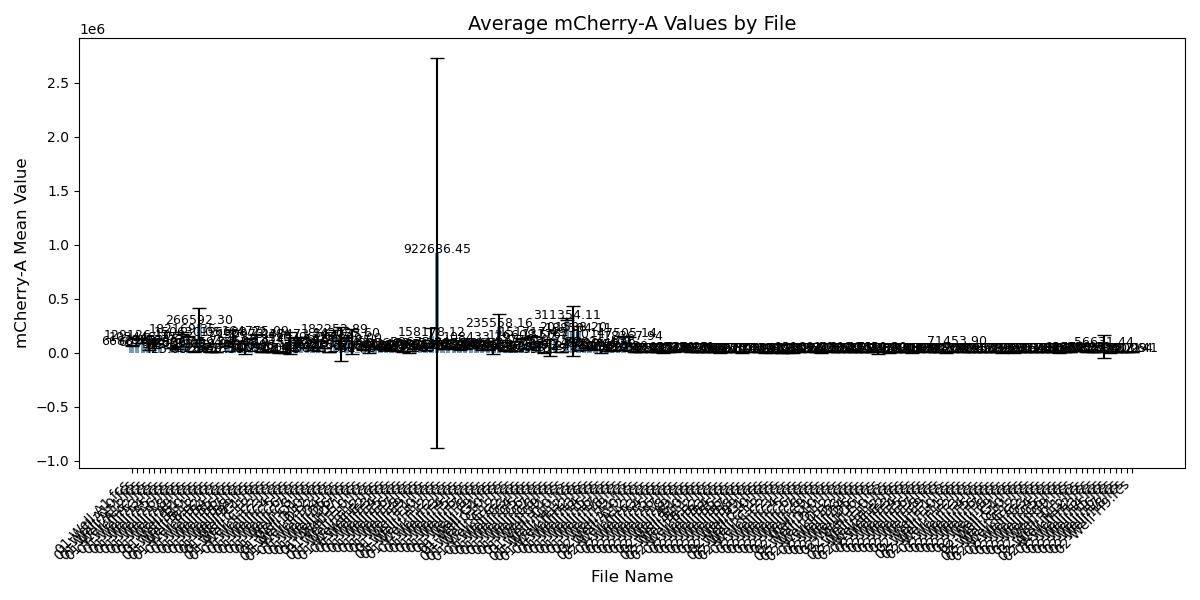

Log scale bar chart saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\mCherry-A_by_file_log_scale.png


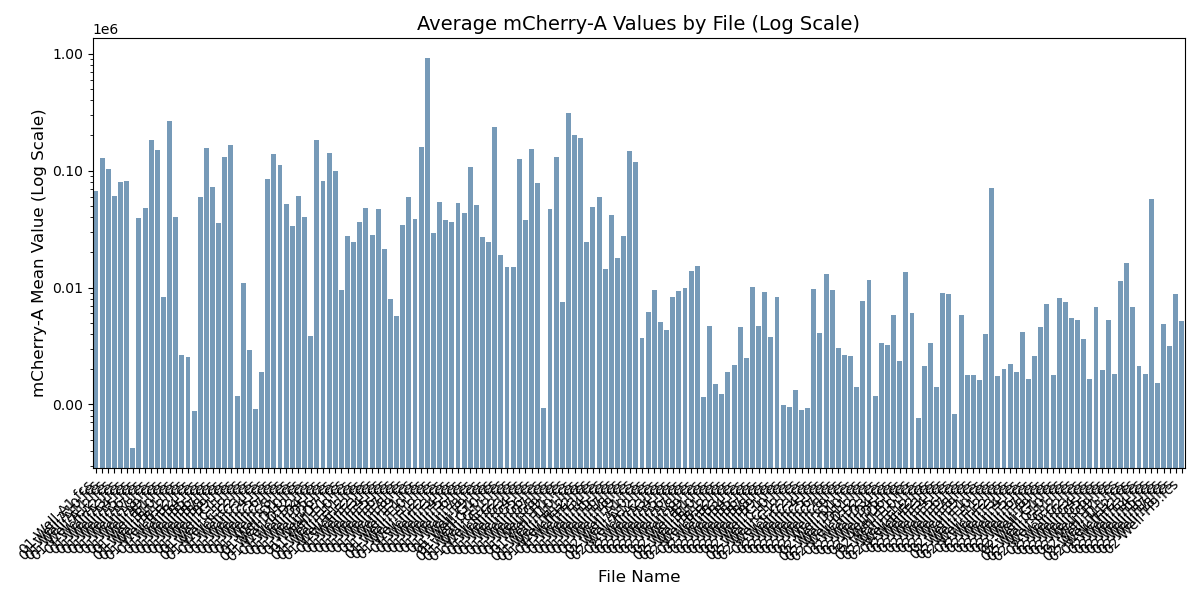

Bar chart sorted by sample size saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\mCherry-A_by_file_sorted.png


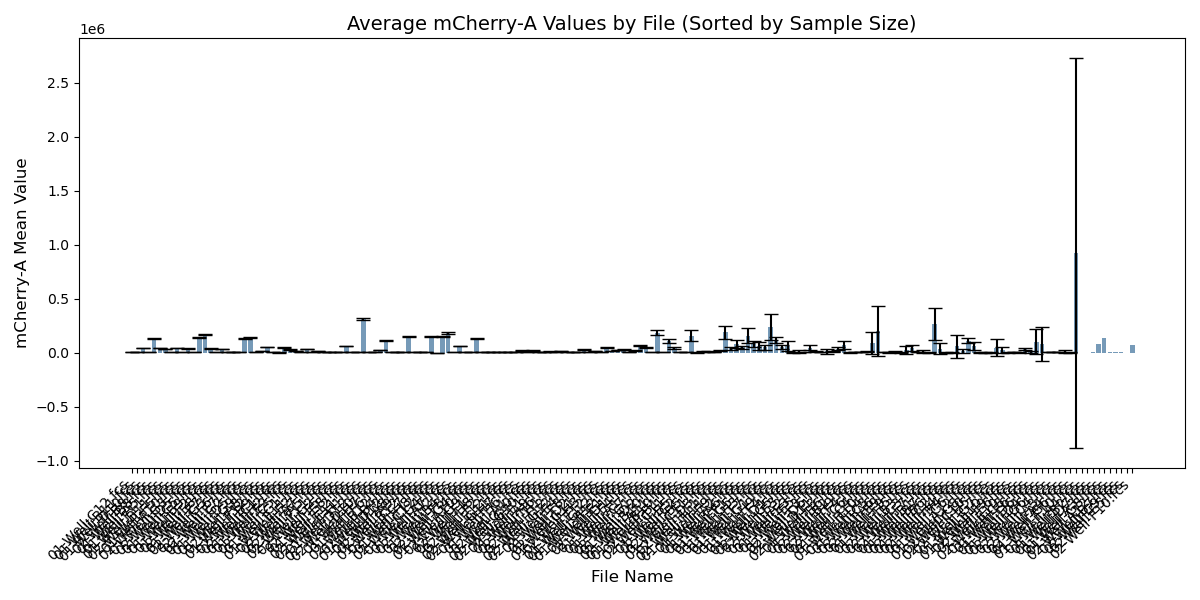

mCherry-A statistics saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\mCherry-A_statistics.csv


In [21]:

# Example usage
if __name__ == "__main__":
    # Set file paths
    csv_path = f'D:\FACS_analysis\{experiment_name}\processed_data_combined.csv'
    output_folder = f'D:\FACS_analysis\{experiment_name}\\analysis_results'

    # Analyze data and generate charts
    mCherry_A_stats = analyze_channel_by_file(csv_path, output_folder, channel='mCherry-A')

Loaded utils_plots from: c:\Users\mingzhchen\Documents\Git\Open_flow\20251107\..\utils_plots.py
Functions: ['analyze_channel_by_file', 'plot_channel_heatmap', 'plot_channel_heatmap_min_count', 'plot_channel_heatmaps_by_plate', 'plot_channel_heatmaps_by_plate_min_count', 'plot_plate_ratio_bars', 'plot_plate_ratio_heatmap']
Reading data file for multi-plate heatmaps: D:\FACS_analysis\Exp_20251107_1\processed_data_combined.csv
 c:\Users\mingzhchen\Documents\Git\Open_flow\20251107\..\utils_plots.py
Functions: ['analyze_channel_by_file', 'plot_channel_heatmap', 'plot_channel_heatmap_min_count', 'plot_channel_heatmaps_by_plate', 'plot_channel_heatmaps_by_plate_min_count', 'plot_plate_ratio_bars', 'plot_plate_ratio_heatmap']
Reading data file for multi-plate heatmaps: D:\FACS_analysis\Exp_20251107_1\processed_data_combined.csv

Generating heatmaps for plate 01 with 203028 events...

Generating heatmaps for plate 01 with 203028 events...
Heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analys

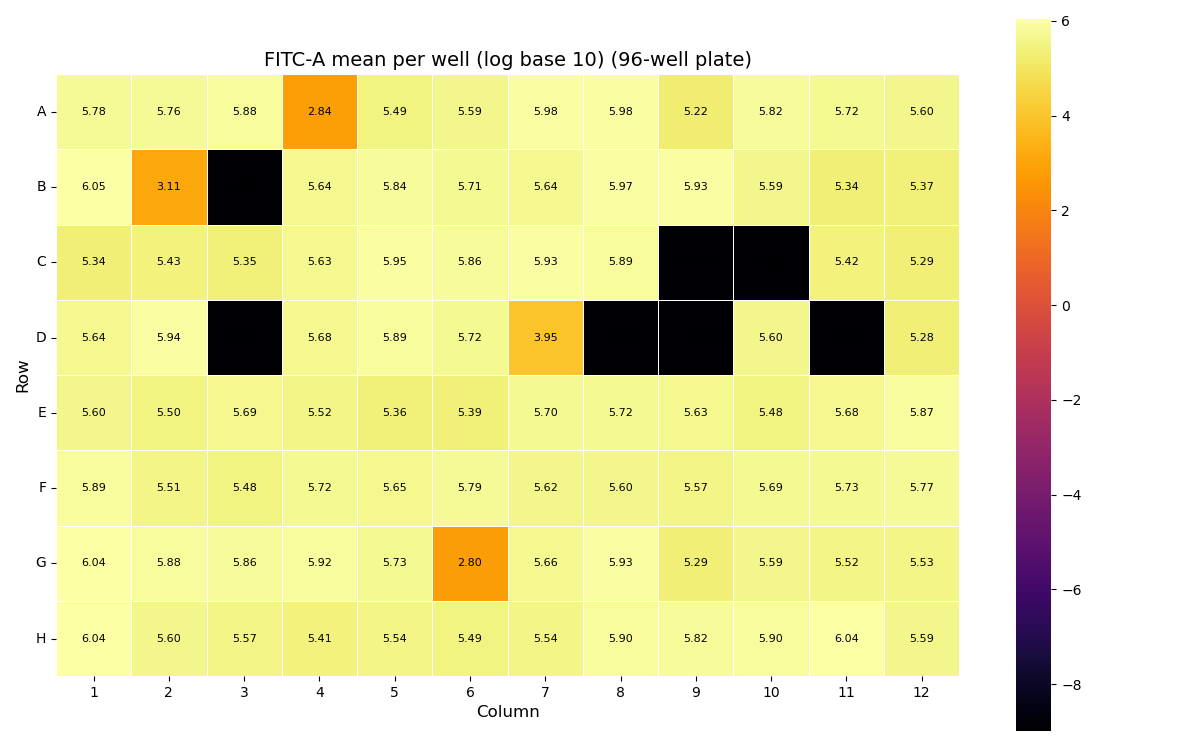

Counts heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_01\FITC-A_plate_heatmap_counts.png



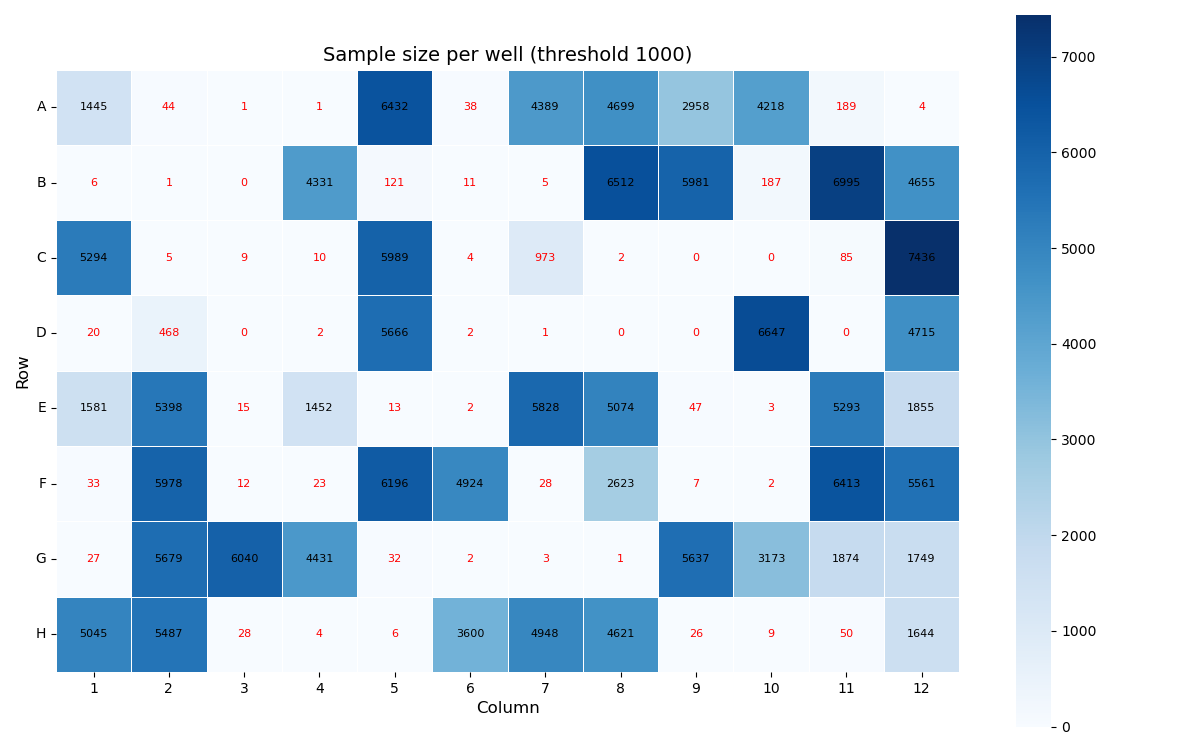

Std heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_01\FITC-A_plate_heatmap_std.png



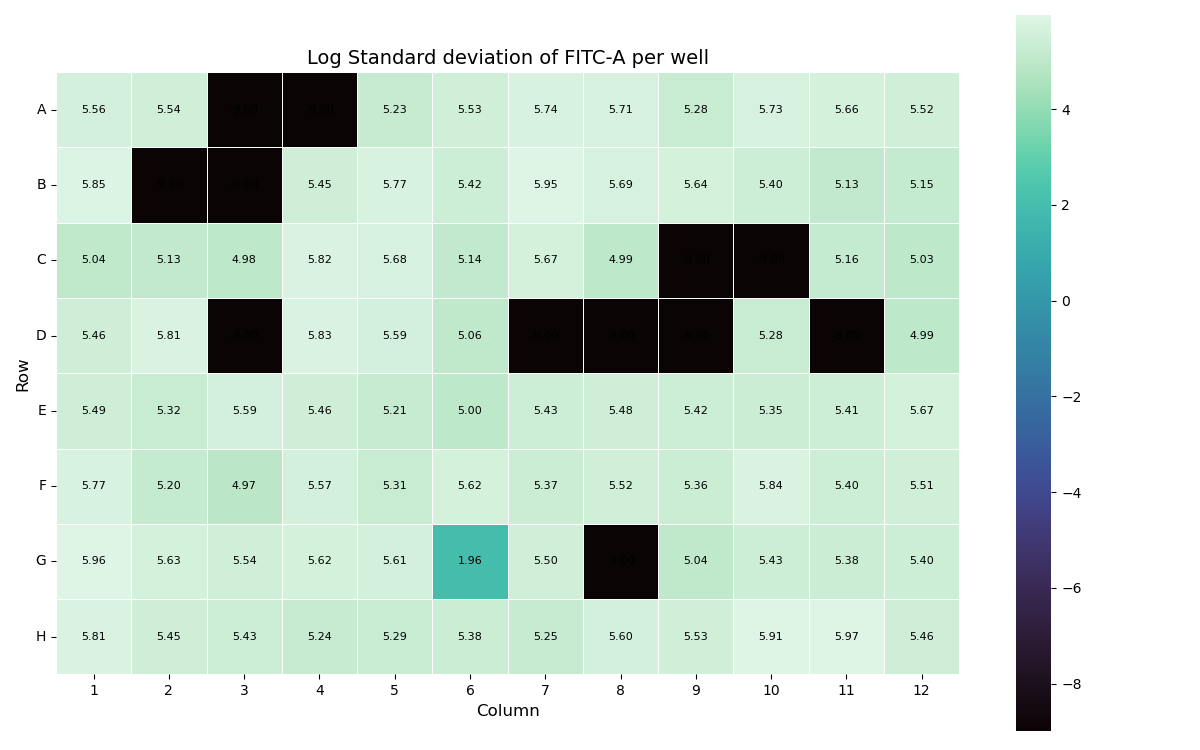

Aggregated well values saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_01\FITC-A_plate_aggregated_mean.csv


Generating heatmaps for plate 02 with 215848 events...

Generating heatmaps for plate 02 with 215848 events...
Heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_02\FITC-A_plate_heatmap_mean_log.png
Heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_02\FITC-A_plate_heatmap_mean_log.png


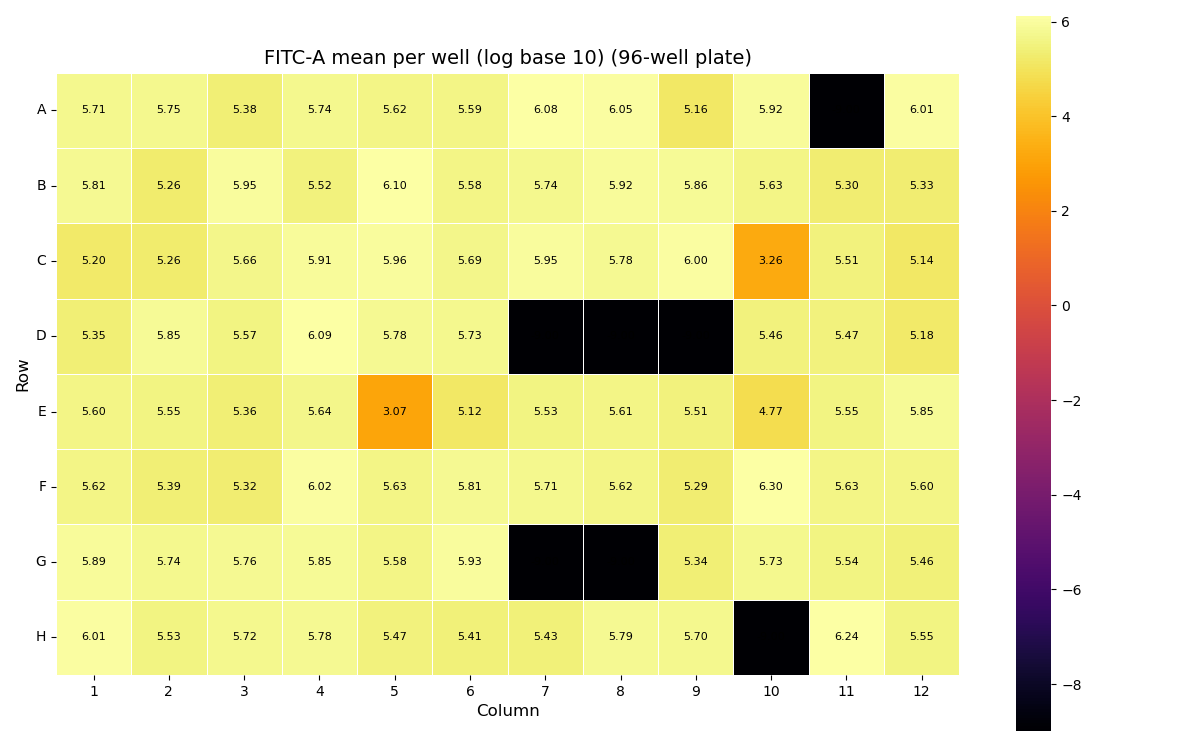

Counts heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_02\FITC-A_plate_heatmap_counts.png



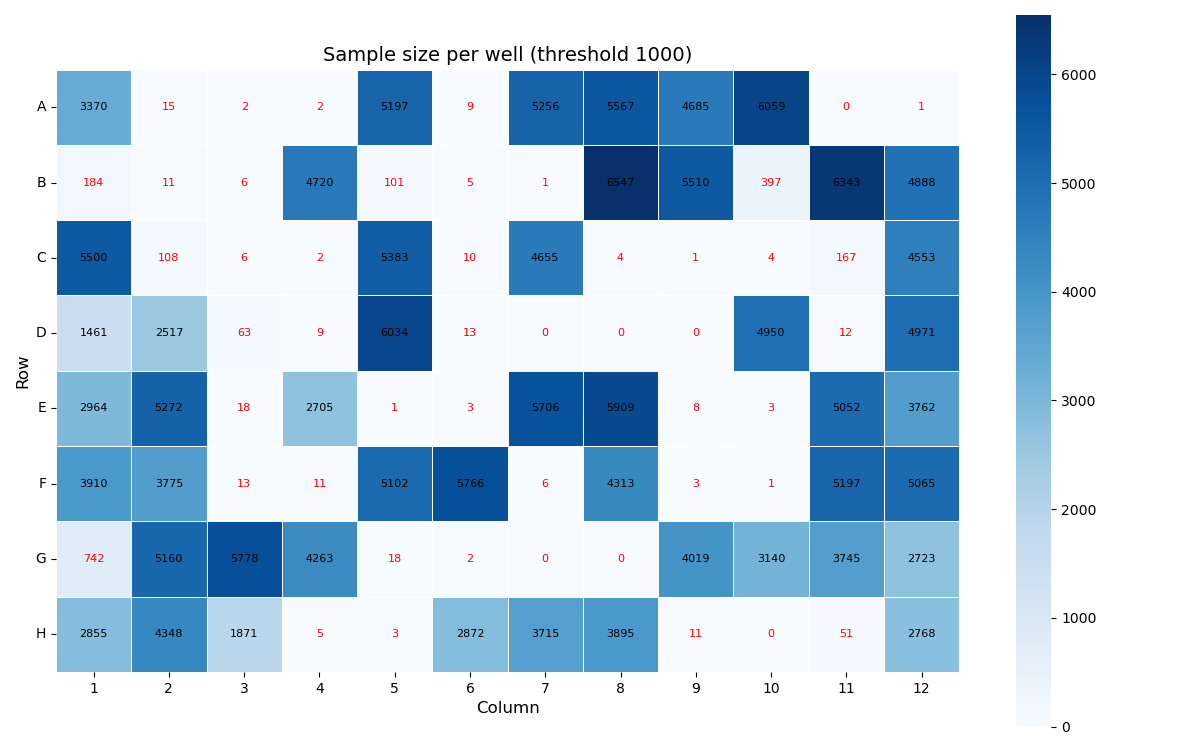

Std heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_02\FITC-A_plate_heatmap_std.png



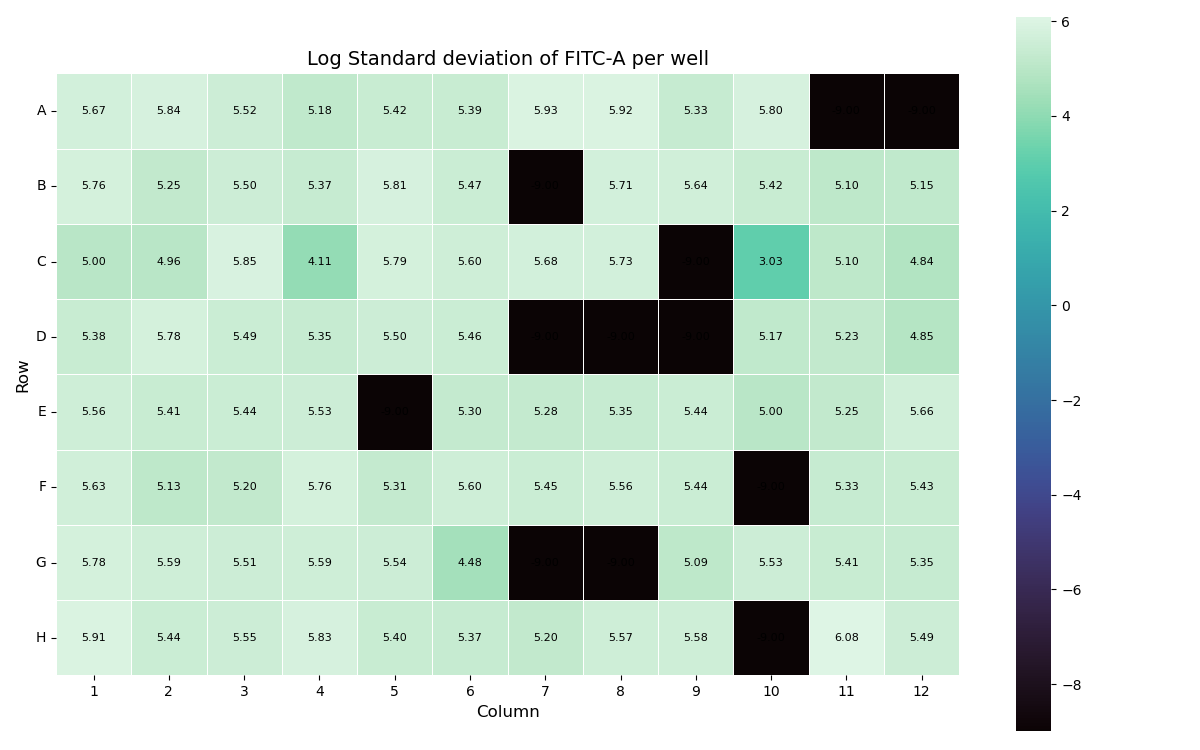

Aggregated well values saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_02\FITC-A_plate_aggregated_mean.csv



{'01':    Well Row  Col         Value  ValueLog   Count            Std    StdLog  \
 0    A1   A    1  5.979842e+05  5.776690  1445.0  366094.245147  5.563593   
 1    A2   A    2  5.798678e+05  5.763329    44.0  347457.064697  5.540901   
 2    A3   A    3  7.666154e+05  5.884578     1.0       0.000000 -9.000000   
 3    A4   A    4  6.851000e+02  2.835754     1.0       0.000000 -9.000000   
 4    A5   A    5  3.115196e+05  5.493485  6432.0  169141.194704  5.228249   
 ..  ...  ..  ...           ...       ...     ...            ...       ...   
 91   H8   H    8  7.984699e+05  5.902259  4621.0  396719.703203  5.598484   
 92   H9   H    9  6.665826e+05  5.823854    26.0  339046.845311  5.530260   
 93  H10   H   10  8.034243e+05  5.904945     9.0  820131.578136  5.913884   
 94  H11   H   11  1.103702e+06  6.042852    50.0  931184.817123  5.969036   
 95  H12   H   12  3.887963e+05  5.589722  1644.0  285518.760346  5.455635   
 
     LowCountFlag  
 0          False  
 1           Tru

In [56]:
import os, sys, inspect, importlib

# Ensure repo root is on path
repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if repo_root not in sys.path:
    sys.path.append(repo_root)

import utils_plots
importlib.reload(utils_plots)
print('Loaded utils_plots from:', utils_plots.__file__)
print('Functions:', [n for n, o in inspect.getmembers(utils_plots, inspect.isfunction)])

from utils_plots import plot_channel_heatmap, plot_channel_heatmaps_by_plate

# Quick sanity: build a tiny fake dataset if target csv not present
csv_path = f'D:\FACS_analysis\{experiment_name}\processed_data_combined.csv'
output_folder = f'D:\FACS_analysis\{experiment_name}\\analysis_results'

# channel = 'APC-A'
channel = 'FITC-A'
# channel = 'mCherry-A'
# Generate heatmaps per plate: value, counts, std for each plate separately
plot_channel_heatmaps_by_plate(
    csv_path,
    output_folder,
    channel= channel,
    agg='mean',
    cmap='inferno',
    value_log=True,
    value_log_base=10.0,
    annotate=True,
    robust=True,
    min_count_threshold=1000,
    plot_counts=True,
    plot_std=True,
    count_cmap='Blues',
    std_cmap='mako',
)

Reading data file for min-count filtering: D:\FACS_analysis\Exp_20251107_1\processed_data_combined.csv

Heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\minCount_1000\FITC-A_plate_heatmap_mean_log.png
Heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\minCount_1000\FITC-A_plate_heatmap_mean_log.png


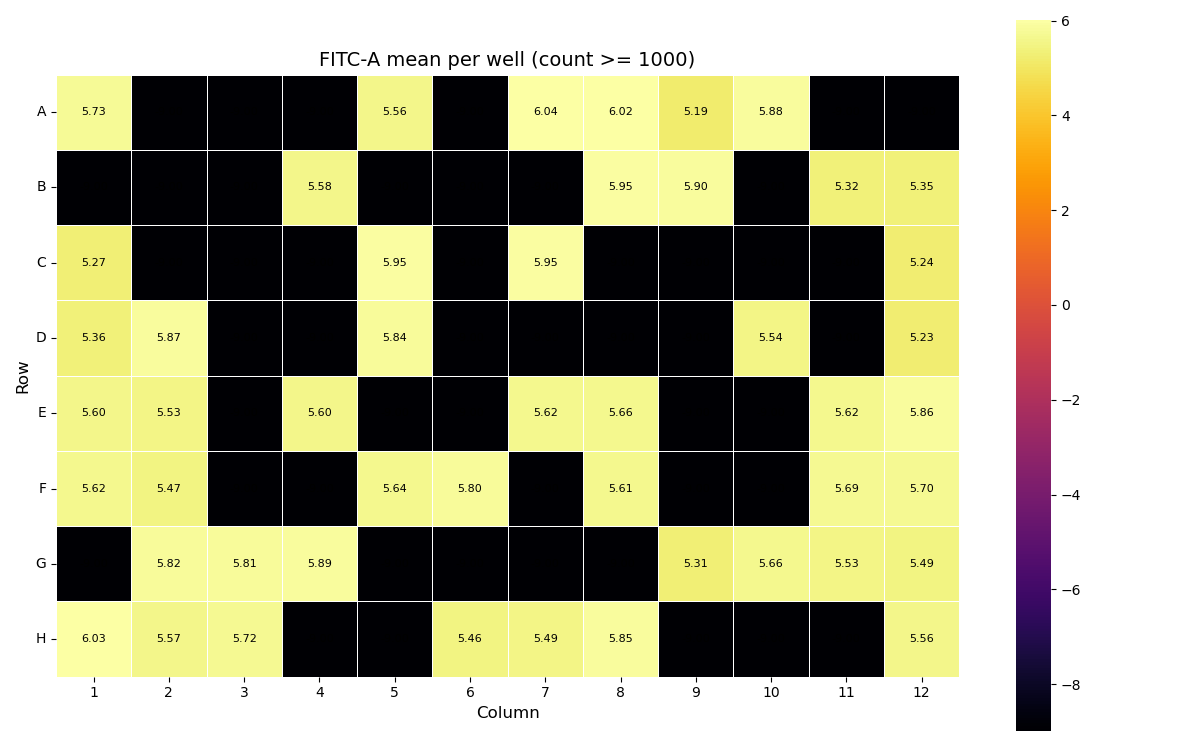

Counts heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\minCount_1000\FITC-A_plate_heatmap_counts.png



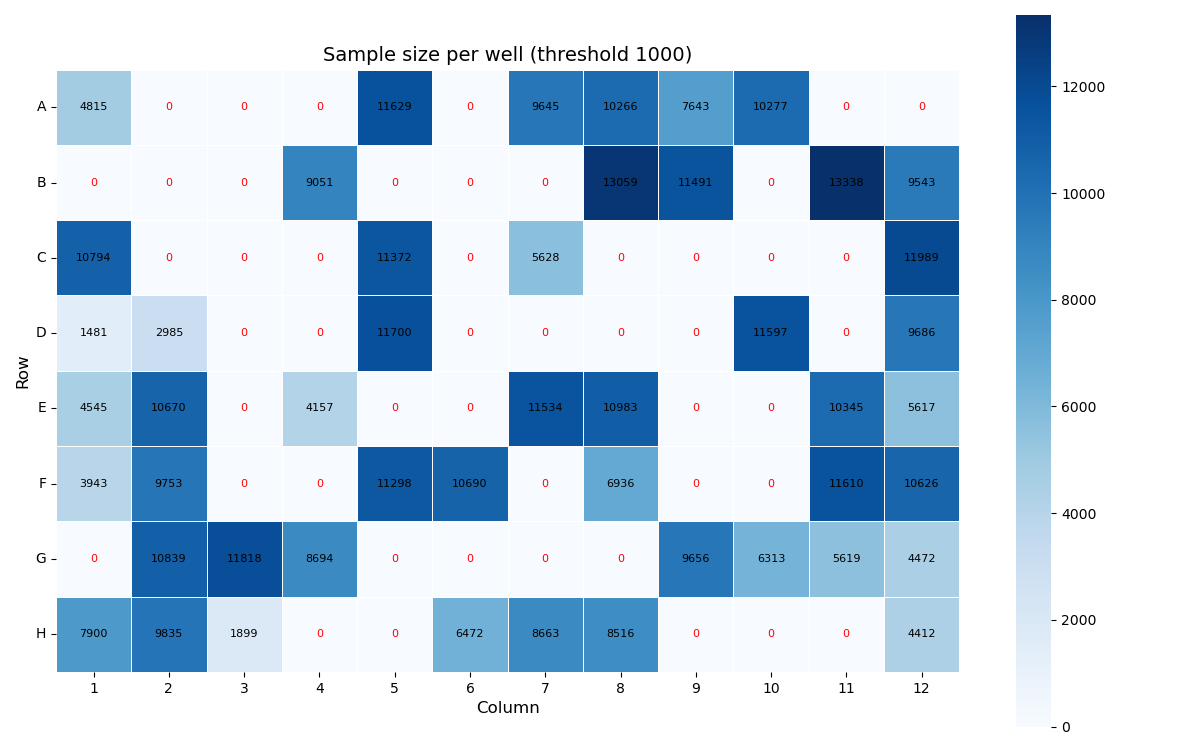

Std heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\minCount_1000\FITC-A_plate_heatmap_std.png



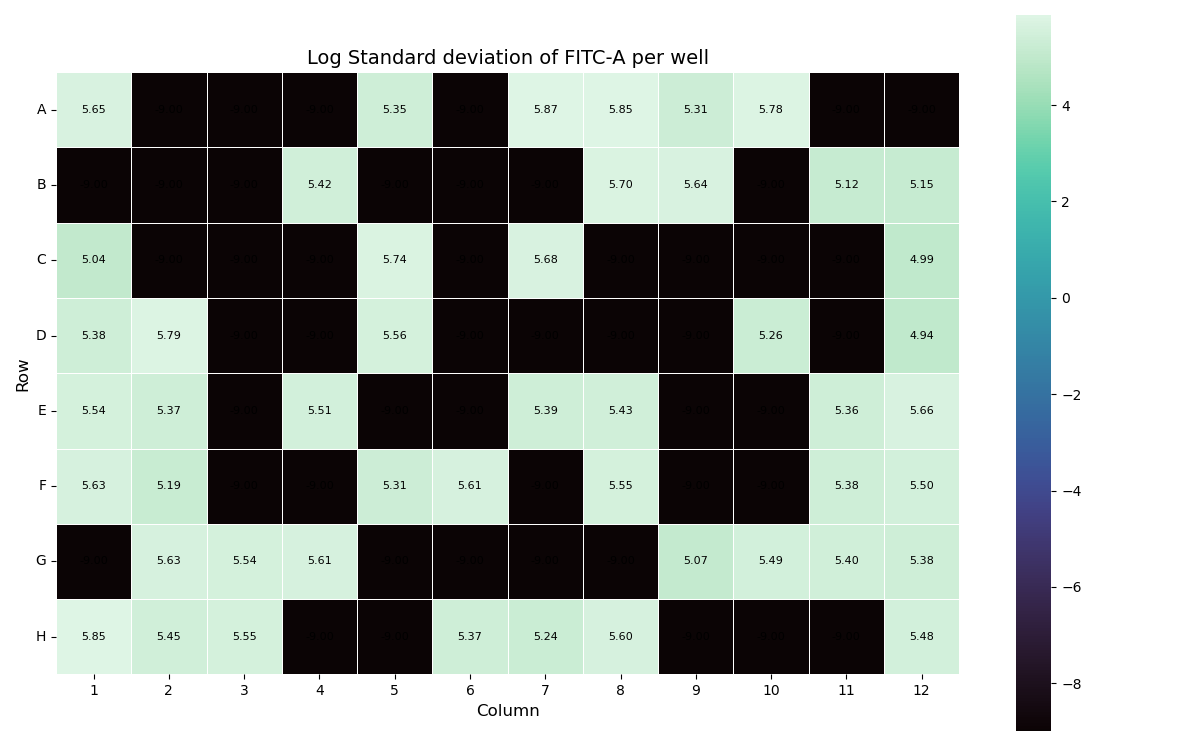

Aggregated well values saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\minCount_1000\FITC-A_plate_aggregated_mean.csv



Well Row  Col          Value  ValueLog    Count            Std    StdLog  \
0    A1   A    1  538535.984777  5.731215   4815.0  445307.728800  5.648660   
1    A2   A    2       0.000000 -9.000000      0.0       0.000000 -9.000000   
2    A3   A    3       0.000000 -9.000000      0.0       0.000000 -9.000000   
3    A4   A    4       0.000000 -9.000000      0.0       0.000000 -9.000000   
4    A5   A    5  359649.687720  5.555880  11629.0  222420.001021  5.347174   
..  ...  ..  ...            ...       ...      ...            ...       ...   
91   H8   H    8  714983.057727  5.854296   8516.0  397280.996856  5.599098   
92   H9   H    9       0.000000 -9.000000      0.0       0.000000 -9.000000   
93  H10   H   10       0.000000 -9.000000      0.0       0.000000 -9.000000   
94  H11   H   11       0.000000 -9.000000      0.0       0.000000 -9.000000   
95  H12   H   12  366208.336061  5.563728   4412.0  303095.987217  5.481580   

    LowCountFlag  
0          False  
1           True  
2           True  
3           True  
4          False  
..           ...  
91         False  
92          True  
93          True  
94          True  
95         False  

[96 rows x 9 columns]

In [57]:
# Plot value heatmap masking wells with sample count < threshold (set to 0)
from utils_plots import plot_channel_heatmap_min_count

threshold = 1000
plot_channel_heatmap_min_count(
    csv_path=csv_path,
    data=None,
    output_folder=output_folder,
    channel= channel,
    threshold=threshold,
    agg='mean',
    cmap='inferno',
    value_log=True,
    value_log_base=10.0,
    annotate=True,
    robust=True,
    plot_counts=True,
    plot_std=True,
    count_cmap='Blues',
    std_cmap='mako',
)

Reading data file for multi-plate min-count heatmaps: D:\FACS_analysis\Exp_20251107_1\processed_data_combined.csv


Generating min-count heatmaps for plate 01 with threshold 1000 and 203028 events...

Generating min-count heatmaps for plate 01 with threshold 1000 and 203028 events...
Heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_01\minCount_1000\FITC-A_plate_heatmap_mean_log.png
Heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_01\minCount_1000\FITC-A_plate_heatmap_mean_log.png


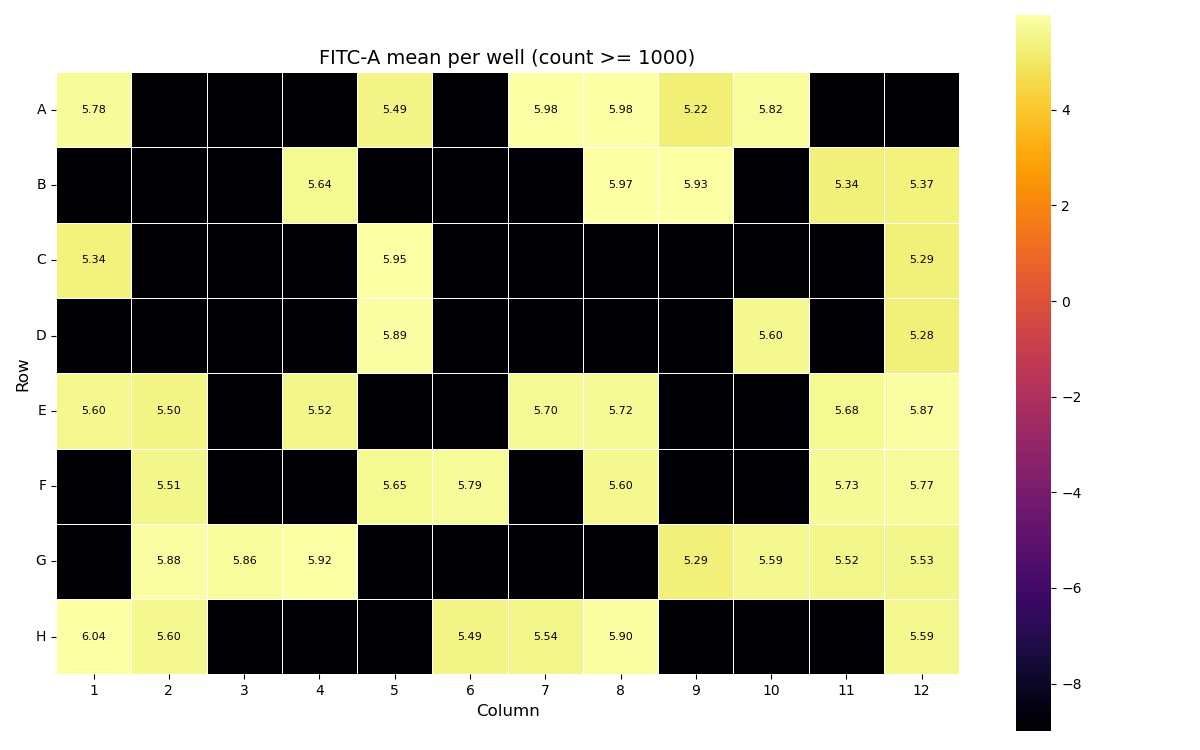

Counts heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_01\minCount_1000\FITC-A_plate_heatmap_counts.png



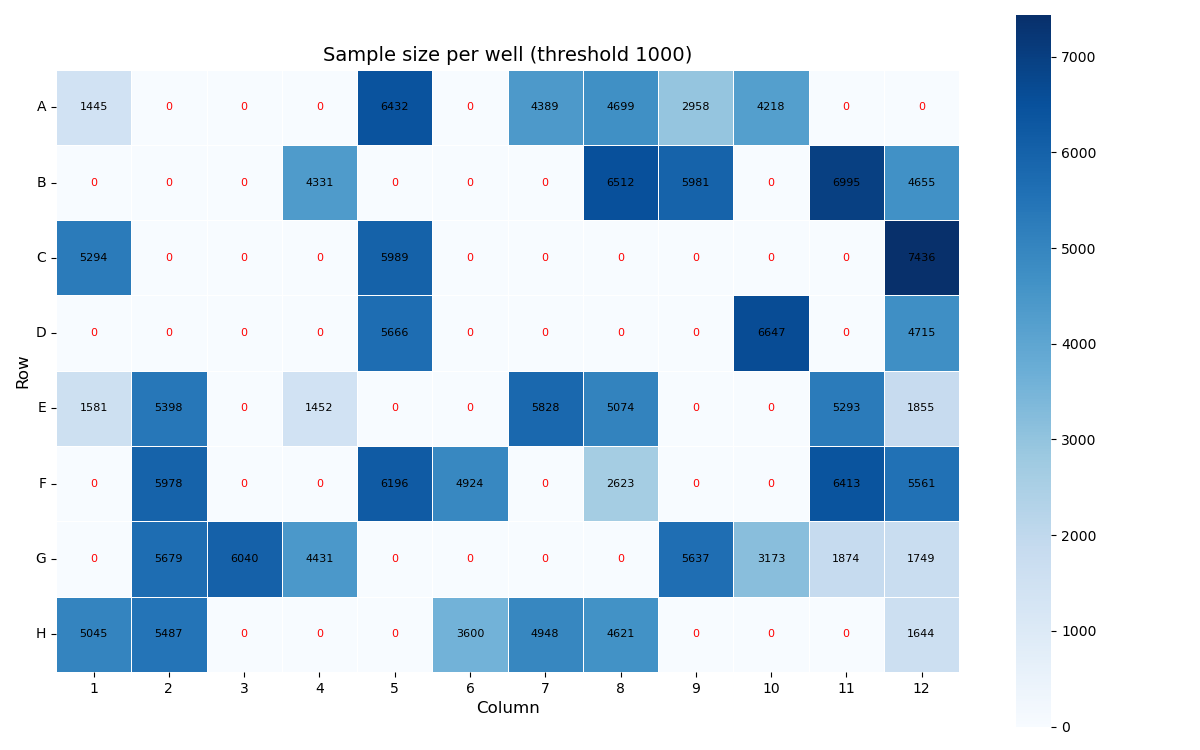

Std heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_01\minCount_1000\FITC-A_plate_heatmap_std.png



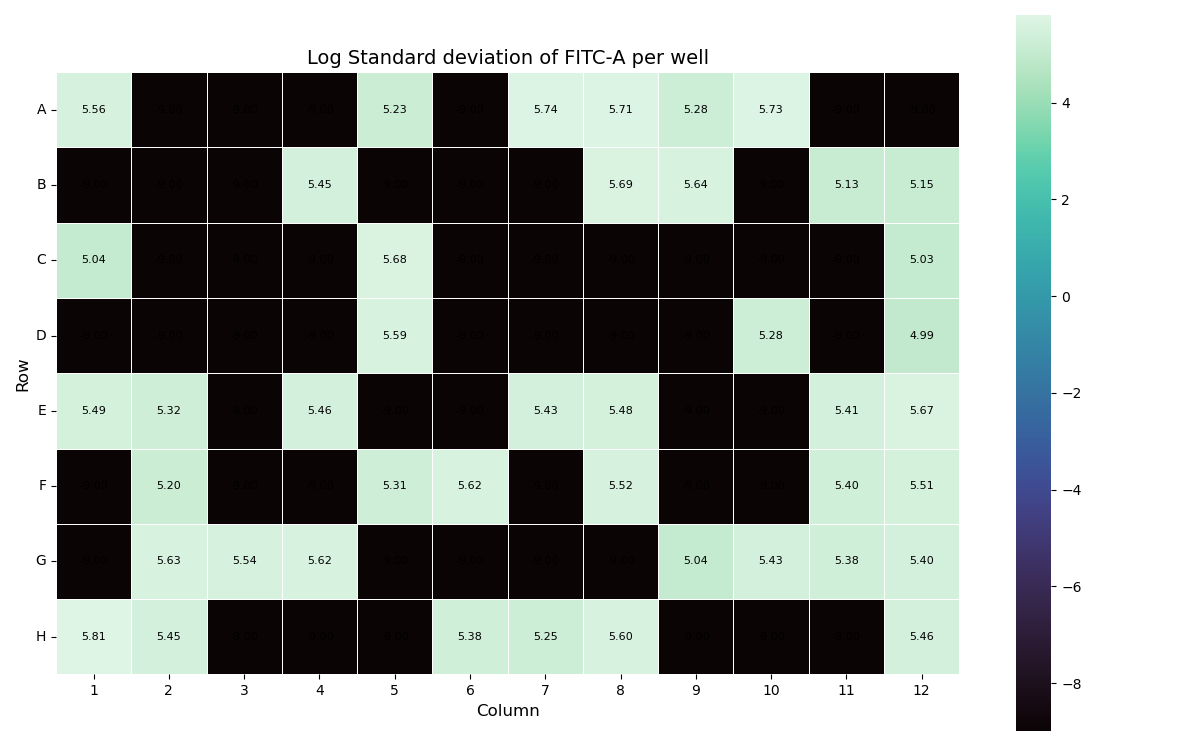

Aggregated well values saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_01\minCount_1000\FITC-A_plate_aggregated_mean.csv


Generating min-count heatmaps for plate 02 with threshold 1000 and 215848 events...

Generating min-count heatmaps for plate 02 with threshold 1000 and 215848 events...
Heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_02\minCount_1000\FITC-A_plate_heatmap_mean_log.png
Heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_02\minCount_1000\FITC-A_plate_heatmap_mean_log.png


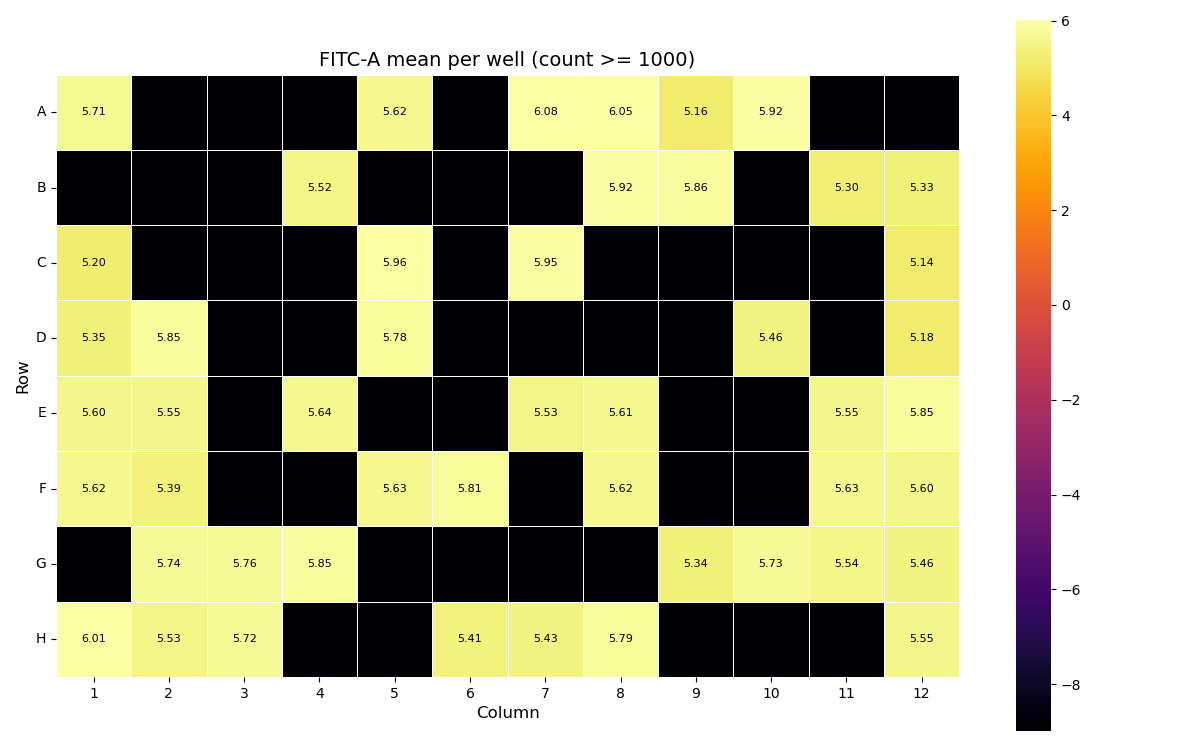

Counts heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_02\minCount_1000\FITC-A_plate_heatmap_counts.png



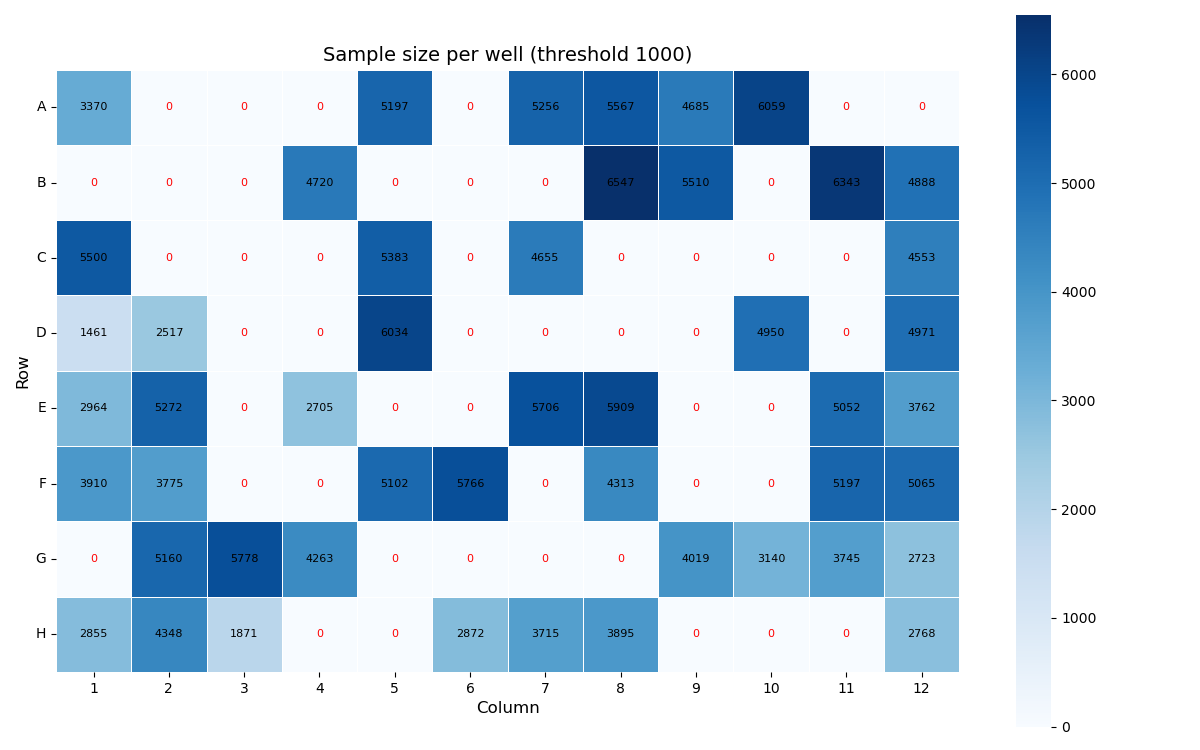

Std heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_02\minCount_1000\FITC-A_plate_heatmap_std.png



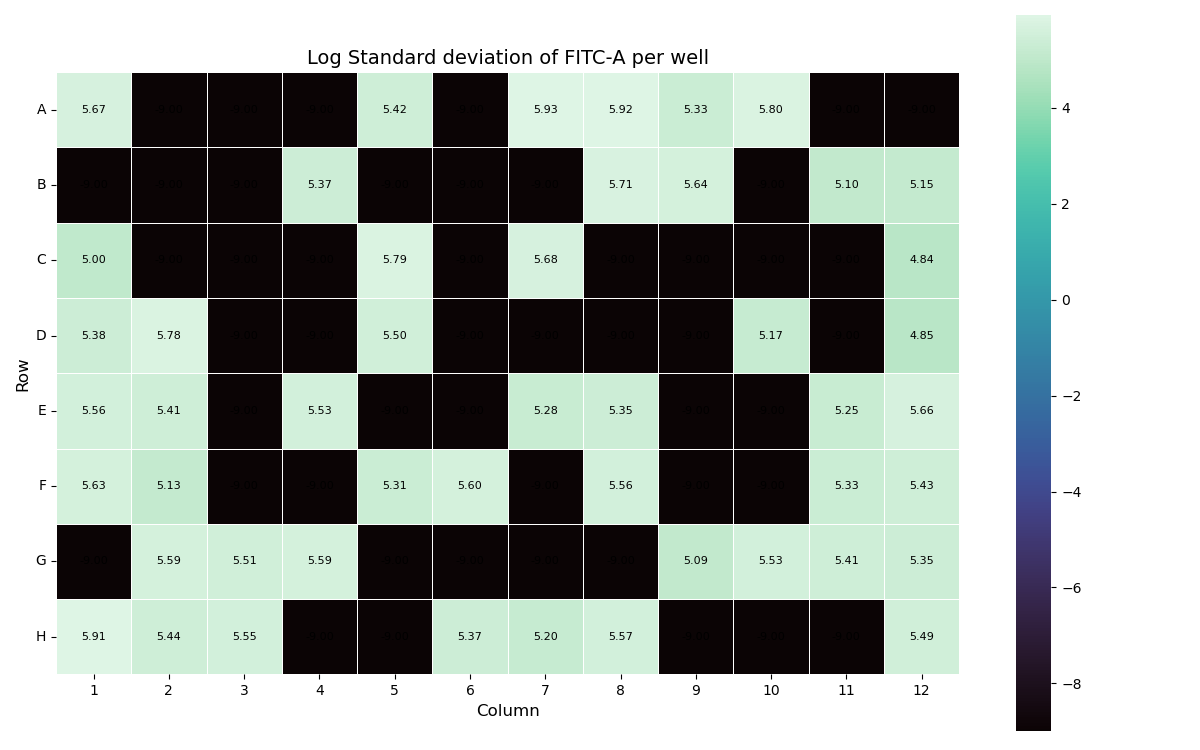

Aggregated well values saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_02\minCount_1000\FITC-A_plate_aggregated_mean.csv



{'01':    Well Row  Col          Value  ValueLog   Count            Std    StdLog  \
 0    A1   A    1  597984.178547  5.776690  1445.0  366094.245147  5.563593   
 1    A2   A    2       0.000000 -9.000000     0.0       0.000000 -9.000000   
 2    A3   A    3       0.000000 -9.000000     0.0       0.000000 -9.000000   
 3    A4   A    4       0.000000 -9.000000     0.0       0.000000 -9.000000   
 4    A5   A    5  311519.605768  5.493485  6432.0  169141.194704  5.228249   
 ..  ...  ..  ...            ...       ...     ...            ...       ...   
 91   H8   H    8  798469.852694  5.902259  4621.0  396719.703203  5.598484   
 92   H9   H    9       0.000000 -9.000000     0.0       0.000000 -9.000000   
 93  H10   H   10       0.000000 -9.000000     0.0       0.000000 -9.000000   
 94  H11   H   11       0.000000 -9.000000     0.0       0.000000 -9.000000   
 95  H12   H   12  388796.273418  5.589722  1644.0  285518.760346  5.455635   
 
     LowCountFlag  
 0          False  
 1  

In [58]:
# Multi-plate heatmaps with min-count filtering
from utils_plots import plot_channel_heatmaps_by_plate_min_count
min_count_threshold = 1000
plot_channel_heatmaps_by_plate_min_count(
    csv_path=csv_path,
    output_folder=output_folder,
    channel= channel,
    threshold=min_count_threshold,
    agg='mean',
    cmap='inferno',
    value_log=True,
    value_log_base=10.0,
    annotate=True,
    robust=True,
    plot_counts=True,
    plot_std=True,
    count_cmap='Blues',
    std_cmap='mako',
)

Reading aggregated CSVs for ratio: 
 - A: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_01\minCount_1000\FITC-A_plate_aggregated_mean.csv
 - B: D:\FACS_analysis\Exp_20251107_1\analysis_results\plate_02\minCount_1000\FITC-A_plate_aggregated_mean.csv

Ratio heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\ratio_01_over_02\minCount_1000\FITC-A_ratio_01_over_02.png
Ratio heatmap saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\ratio_01_over_02\minCount_1000\FITC-A_ratio_01_over_02.png


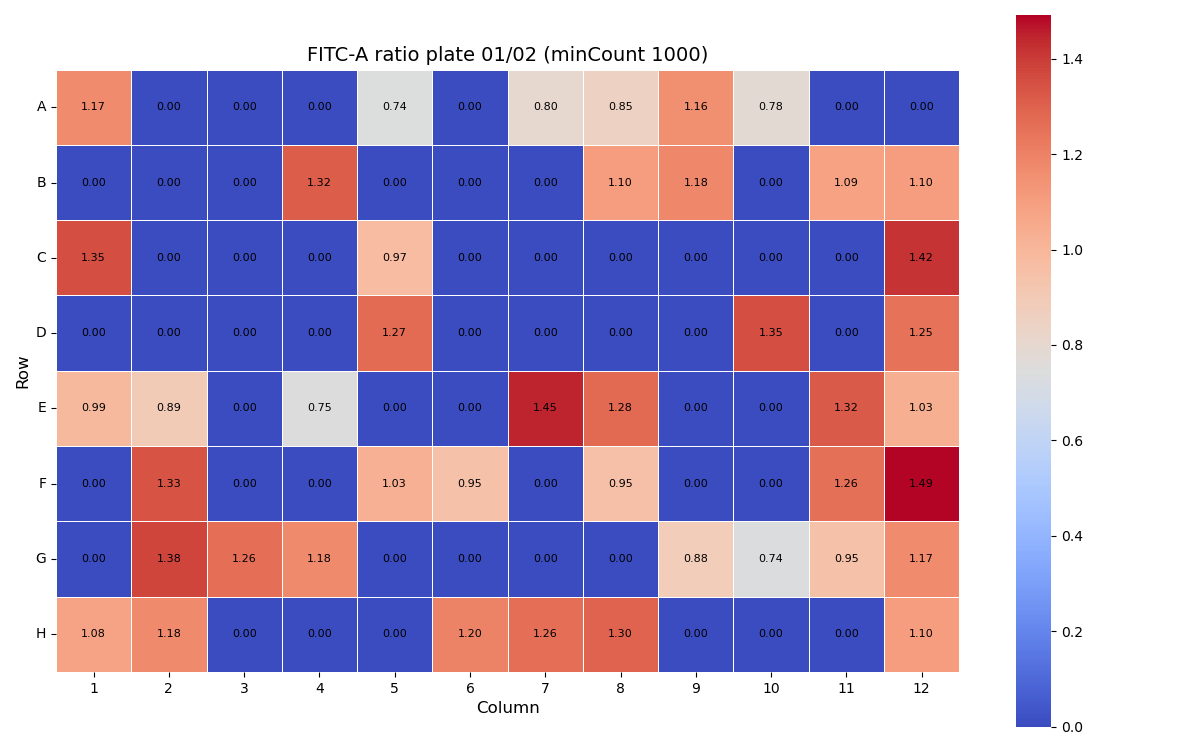

Ratio CSV saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\ratio_01_over_02\minCount_1000\FITC-A_ratio_01_over_02.csv



Well Row  Col         ValueA         ValueB     Ratio
0   A1   A    1  597984.178547  513045.587151  1.165558
1   A2   A    2       0.000000       0.000000  0.000000
2   A3   A    3       0.000000       0.000000  0.000000
3   A4   A    4       0.000000       0.000000  0.000000
4   A5   A    5  311519.605768  419217.262690  0.743098

In [59]:
# Plate ratio heatmap: plate 01 / plate 02 from minCount_1000 aggregated CSVs
from utils_plots import plot_plate_ratio_heatmap

ratio_df = plot_plate_ratio_heatmap(
    output_root=output_folder,
    channel= channel,
    agg='mean',
    plate_a='01',
    plate_b='02',
    threshold=1000,
    cmap='coolwarm',
    annotate=True,
    value_log=False,
)
ratio_df.head()

Values side-by-side bar plot saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\ratio_01_over_02\minCount_1000\FITC-A_bars_01_vs_02.png



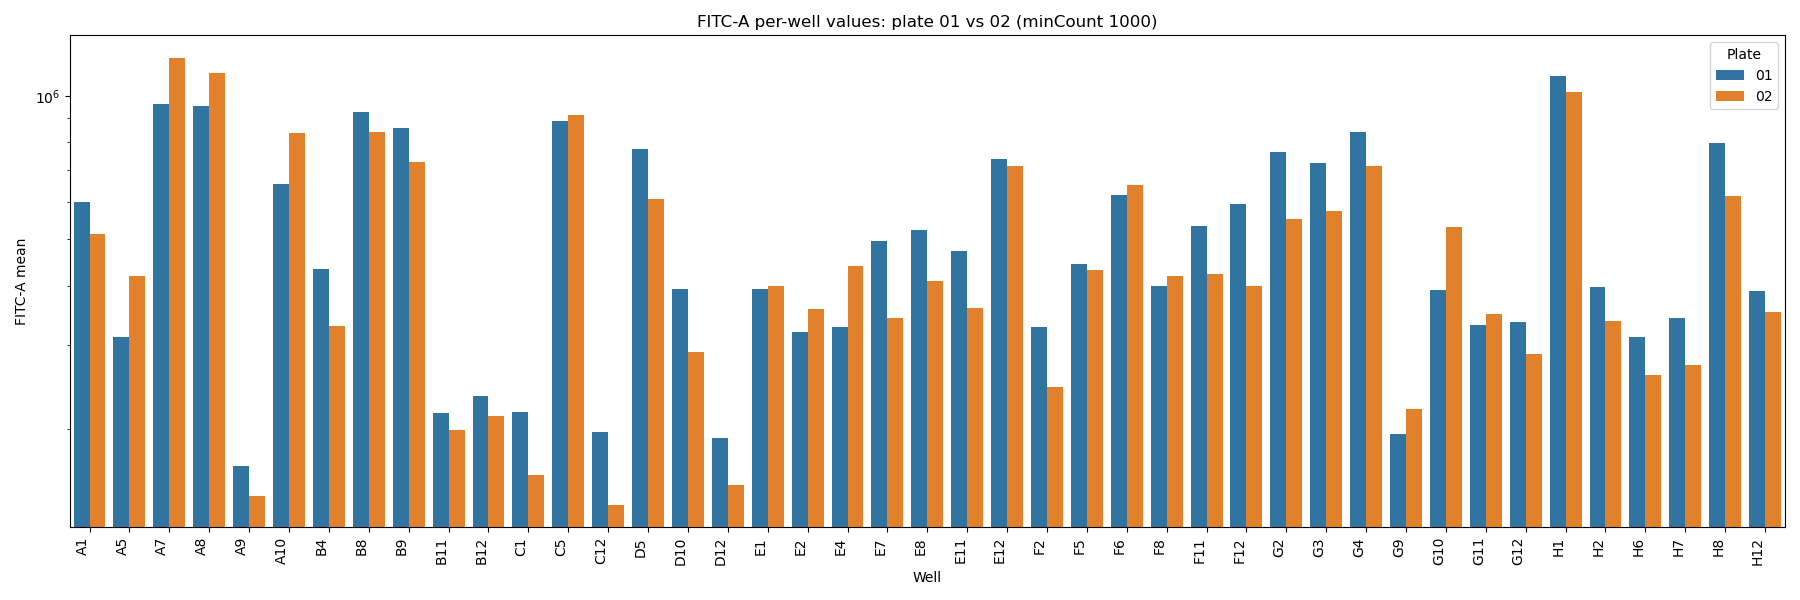

Fold change bar plot saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\ratio_01_over_02\minCount_1000\FITC-A_fold_change_01_over_02.png



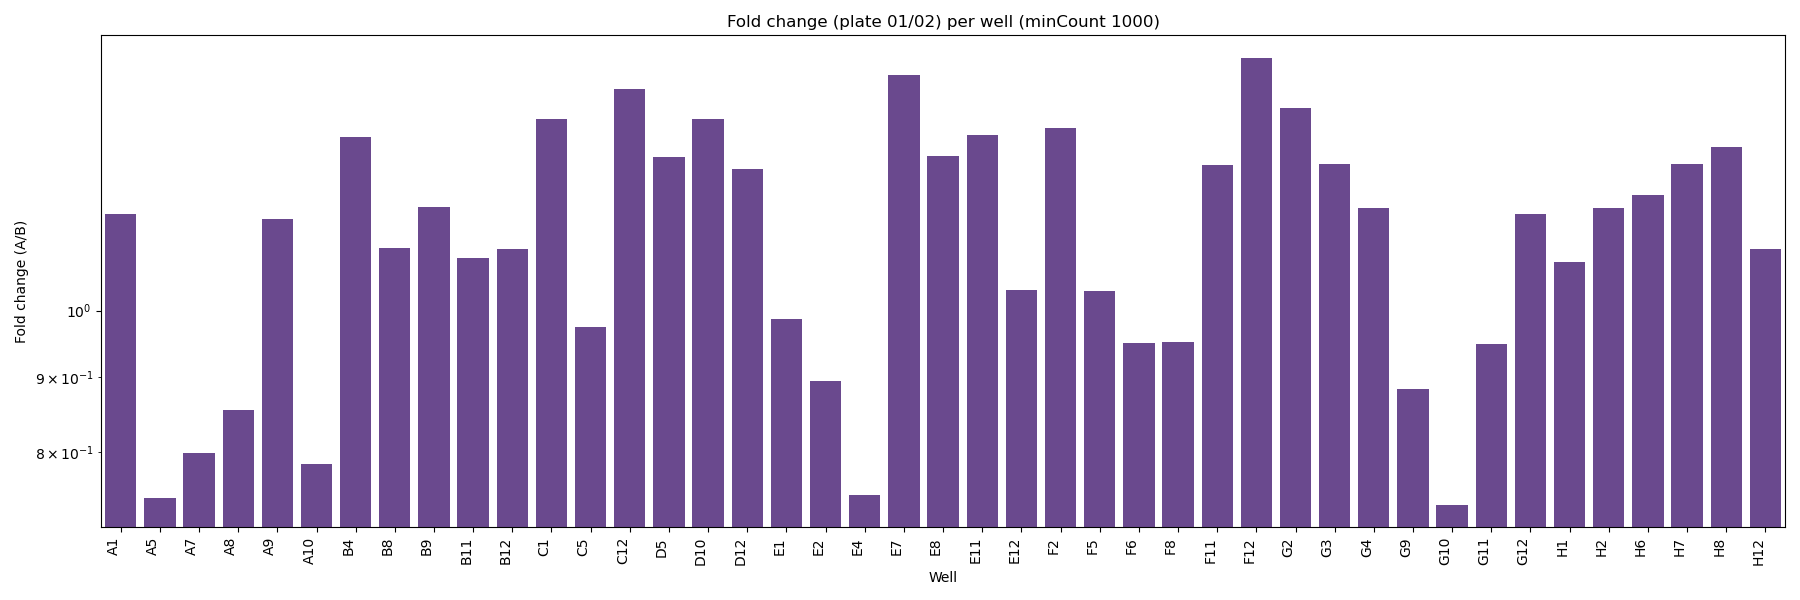

Ratio table saved to: D:\FACS_analysis\Exp_20251107_1\analysis_results\ratio_01_over_02\minCount_1000\FITC-A_ratio_table_01_over_02.csv



In [60]:
# Same bar plots but with log y-axis on both charts
from utils_plots import plot_plate_ratio_bars

_ = plot_plate_ratio_bars(
    output_root=output_folder,
    channel= channel,
    agg='mean',
    plate_a='01',
    plate_b='02',
    threshold=1000,
    nonzero_only=True,
    colors=('#1f77b4', '#ff7f0e'),
    figsize_values=(18, 6),
    figsize_ratio=(18, 6),
    rotate_xticks=90,
    sort=None,
    annotate=False,
    values_log=True,
    ratio_log=True,
)

In [ ]:
file = r'D:\FACS_analysis\Exp_20251107_1\analysis_results\ratio_01_over_02\minCount_1000\mCherry-A_ratio_01_over_02.csv'
# Read the ratio CSV file
ratio_df = pd.read_csv(file)
ratio_df.head()
# display the top 10 wells with highest ratio
ratio_df.sort_values('Ratio', ascending=False).head(10)
# Display the lowest 10 wells with non-zero ratio
ratio_df[ratio_df['Ratio'] > 0].sort_values('Ratio', ascending=True).head(10)
# Display the 10 lowest wells with ValueB,which means the backgound, but not zero
ratio_df[ratio_df['ValueB'] > 0].sort_values('ValueB', ascending=True).head(10)
